In [343]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import ModelFlare_final as mf
import seaborn as sns 
import astropy.coordinates as coord
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

from IPython.display import Image, display

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
#Reading in ID mapping
df_idxmatch436 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_436.parquet')
df_idxmatch437 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_437.parquet')
df_idxmatch488 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_488.parquet')
df_idxmatch489 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_489.parquet')
df_idxmatch538 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_538.parquet')
df_idxmatch539 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_539.parquet')
df_idxmatch540 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_540.parquet')
df_idxmatch541 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_541.parquet')
df_idxmatch591 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_591.parquet')
df_idxmatch592 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_592.parquet')
df_idxmatch638 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_638.parquet')
df_idxmatch639 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_639.parquet')
df_idxmatch685 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_685.parquet')
df_idxmatch686 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/matchid_mapping/matchid_map_686.parquet')

In [4]:
idxmatch = [df_idxmatch436, df_idxmatch437,df_idxmatch488,df_idxmatch489,df_idxmatch538,df_idxmatch539,
               df_idxmatch540,df_idxmatch541,df_idxmatch591,df_idxmatch592,df_idxmatch638,df_idxmatch639,
               df_idxmatch685,df_idxmatch686]

df_idxmatch = pd.DataFrame()
for i in idxmatch:
    df_idxmatch = df_idxmatch.append(i)

In [5]:
df_idxmatch['unique_matchids_exploded'] = df_idxmatch['unique_matchids_exploded'].astype(int)

In [196]:
df_idxmatch436.head()

matchid          ra       dec  ztf_n_obs  \
0  10435322116782  280.675461 -1.646806          2   
1  10435322156518  280.676054 -1.643882         44   
2  10435322080496  280.676259 -1.647395          2   
3  10435322142211  280.676404 -1.642892          7   
4  10435322042113  280.676568 -1.648677         95   

   exploded_unique_matchids_index  unique_matchids_exploded  
0                               0              1.043532e+13  
1                               0              1.043532e+13  
2                               0              1.043532e+13  
3                               0              1.043532e+13  
4                               0              1.043532e+13

In [7]:
df_idxmatch_nodup = df_idxmatch.drop_duplicates(subset=['matchid'])

In [107]:
len(df_idxmatch_nodup)

124296039

In [8]:
#read in green xmatch
df_g19_xmatch436 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=436')
df_g19_xmatch437 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=437')
df_g19_xmatch488 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=488')
df_g19_xmatch489 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=489')
df_g19_xmatch538 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=538')
df_g19_xmatch539 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=539')
df_g19_xmatch540 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=540')
df_g19_xmatch541 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=541')
df_g19_xmatch591 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=591')
df_g19_xmatch592 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=592')
df_g19_xmatch638 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=638')
df_g19_xmatch639 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=639')
df_g19_xmatch685 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=685')
df_g19_xmatch686 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/g19_match/key=686')

In [9]:
g19_xmatch = [df_g19_xmatch436, df_g19_xmatch437,df_g19_xmatch488,df_g19_xmatch489,df_g19_xmatch538,df_g19_xmatch539,
              df_g19_xmatch540,df_g19_xmatch541,df_g19_xmatch591,df_g19_xmatch592,df_g19_xmatch638,df_g19_xmatch639,
              df_g19_xmatch685,df_g19_xmatch686]

df_g19_xmatch = pd.DataFrame()
for i in g19_xmatch:
    df_g19_xmatch = df_g19_xmatch.append(i)

In [10]:
df_g19_xmatch.head()

matchid          ra       dec      dm_16      E_16     Mr_16  \
0  10435322156518  280.676054 -1.643882  12.614978  1.050425  1.875815   
1  10435322042113  280.676568 -1.648677  11.017821  1.039677  2.925815   
2  10435322142026  280.677176 -1.635635  12.414134  1.378543  1.800000   
3  10435322041693  280.678004 -1.640589  11.177934  0.742131  3.100000   
4  10435322116342  280.678074 -1.635666  13.293195  2.027949 -0.450000   

   FeH_16      dm_50      E_50  Mr_50  FeH_50      dm_84      E_84     Mr_84  \
0   -0.70  14.036073  1.137076   2.75   -0.45  15.117517  1.239276  3.824185   
1   -0.60  11.827391  1.164479   4.10   -0.35  13.269290  1.274188  5.374185   
2   -0.70  13.720051  1.478382   2.90   -0.40  15.170022  1.584317  3.950000   
3   -0.60  11.417916  0.800902   3.35   -0.40  11.788458  0.837992  3.500000   
4   -0.65  13.726082  2.067841   0.15   -0.45  14.420890  2.099801  0.500000   

   FeH_84              gaia_id  
0   -0.20  4260126628669270656  
1   -0.15  4260126624385214080  
2   -0.20  4260126937906960640  
3   -0.15  4260126933620555136  
4   -0.25                    0

In [11]:
#Reading in Gaia
df_xmatch436 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=436')
df_xmatch437 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=437')
df_xmatch488 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=488')
df_xmatch489 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=489')
df_xmatch538 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=538')
df_xmatch539 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=539')
df_xmatch540 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=540')
df_xmatch541 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=541')
df_xmatch591 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=591')
df_xmatch592 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=592')
df_xmatch638 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=638')
df_xmatch639 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=639')
df_xmatch685 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=685')
df_xmatch686 = pd.read_parquet('../epyc/users/ecbellm/stellar_flares/gaia_match/key=686')

In [ ]:
xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

df_xmatch = pd.DataFrame()
for i in xmatch:
    df_xmatch = df_xmatch.append(i)

In [ ]:
df_xmatch.head()

### Relavent papers for referance 
Paper describing Green19 data: https://arxiv.org/pdf/1905.02734.pdf
<br>Paper describing Pan-STARRS1 which is used in Green19: https://arxiv.org/pdf/1203.0297.pdf

In [ ]:
stats_436 = pd.read_csv('found_flares_436/stats2_ztf_000436.csv')
stats_437 = pd.read_csv('found_flares_437/stats2_ztf_000437.csv')
stats_488 = pd.read_csv('found_flares_488/stats2_ztf_000488.csv')
stats_489 = pd.read_csv('found_flares_489/stats2_ztf_000489.csv')
stats_538 = pd.read_csv('found_flares_538/stats2_ztf_000538.csv')
stats_539 = pd.read_csv('found_flares_539/stats2_ztf_000539.csv')
stats_540 = pd.read_csv('found_flares_540/stats2_ztf_000540.csv')
stats_541 = pd.read_csv('found_flares_541/stats2_ztf_000541.csv')
stats_591 = pd.read_csv('found_flares_591/stats2_ztf_000591.csv')
stats_592 = pd.read_csv('found_flares_592/stats2_ztf_000592.csv')
stats_638 = pd.read_csv('found_flares_638/stats2_ztf_000638.csv')
stats_639 = pd.read_csv('found_flares_639/stats2_ztf_000639.csv')
stats_685 = pd.read_csv('found_flares_685/stats2_ztf_000685.csv')
stats_686 = pd.read_csv('found_flares_686/stats2_ztf_000686.csv')

In [ ]:
df_stats = pd.read_csv('stats_final.csv', header=None)

In [ ]:
stats = [stats_436, stats_437, stats_488, stats_489, stats_538, stats_539, stats_540, 
         stats_541, stats_591, stats_592, stats_638, stats_639, stats_685, stats_686]

df_stats2 = pd.DataFrame()
for i in stats:
    df_stats2 = df_stats2.append(i)


In [163]:
df_stats2.head()

match_file      id  aic_flare  chi_flare  \
0  ztf_000436_zr_c01_q1_match_programid   33146  32.553065  24.553065   
1  ztf_000436_zr_c01_q1_match_programid   65253  63.539249  55.539249   
2  ztf_000436_zr_c01_q1_match_programid   67219  23.369396  15.369396   
3  ztf_000436_zr_c01_q1_match_programid   98283  50.734917  42.734917   
4  ztf_000436_zr_c01_q1_match_programid  103617  55.566476  47.566476   

   dof_flare  red_flare  aic_gauss  chi_gauss  dof_gauss  red_gauss  \
0         24   1.023044  24.935904  16.935904         24   0.705663   
1         32   1.735602  25.440915  17.440915         32   0.545029   
2         21   0.731876  16.508090   8.508090         21   0.405147   
3         31   1.378546  32.736103  24.736103         31   0.797939   
4         58   0.820112  37.265068  29.265068         58   0.504570   

       exp_comp  perc_comp                fl_indx    equivdur          ra  \
0  2.217964e-02  -7.617161      [194 195 196 197]  327.523874  287.395600   
1  5.333988e-09 -38.098333       [63 64 65 66 67]  338.046711  287.700827   
2  3.236580e-02  -6.861306             [28 29 30]  172.004763  287.422084   
3  1.234830e-04 -17.998814      [109 110 111 112]  680.170559  287.597438   
4  1.061450e-04 -18.301409  [106 107 108 109 110]  330.721574  287.398042   

        dec      xpos      ypos    flare_time      end_time  flare_end_diff  \
0 -5.148791  2269.170  1695.843  58348.317905  58348.327107        0.005984   
1 -4.935116  1194.142  1184.821  58347.306482  58348.327107        1.016944   
2 -4.981991  2178.840  1361.822  58347.273877  58348.327107        1.051389   
3 -4.972078  1551.066  1086.980  58348.238391  58348.327107        0.086412   
4 -5.136763  2258.731  1672.645  58348.242072  58348.327107        0.081366   

   n_catflags  
0           1  
1           1  
2           1  
3           1  
4           1

In [ ]:
df_stats = pd.DataFrame(df_stats.values, columns = ["match_file", "axs_id", "AIC_f", "chisq_f", "dof_f", "red_f", 
                                                    "AIC_g", "chisq_g", "dof_g", "red_g", "compare_exp", "compare_per", "n_obs"])
df_stats = df_stats[['axs_id','n_obs']]

In [162]:
df_stats.head()

axs_id n_obs
0  10436002033146   205
1  10436002065253   193
2  10436002067219   183
3  10436002098283   201
4  10436002103617   198

### AXS ID's from the ztf data

In [ ]:
def quad_ccd_to_rc(quadrant, ccd):
    b = 4 * (ccd - 1)
    rc = b + quadrant - 1
    return rc
    
def axs_id(df):
    df = df.reset_index(drop=True)
    axs_id = []
    for i in range(len(df)):
        field = df['match_file'][i].split('_')[1][3:]
        quadrant = df['match_file'][i].split('_')[4][1]
        ccd = df['match_file'][i].split('_')[3][1:]
        rc = quad_ccd_to_rc(int(quadrant),int(ccd))
        field = str(field).zfill(4)
        rc = str(rc).zfill(2)
        idztf = str(df['id'][i]).zfill(6)
        axs_id_new = '1'  + field + rc + '2'  + idztf
        axs_id.append(axs_id_new)
        #matchid_prefix_string = "{:04}{:02}".format(field,rc)
    print(len(axs_id), len(df))
    df['axs_id'] = axs_id
    return df

In [ ]:
df_statsid = axs_id(df_stats2)

In [ ]:
df_statsid['axs_id'] = df_statsid['axs_id'].astype(int)
df_stats['axs_id'] = df_stats['axs_id'].astype(int)

In [ ]:
stats_full = pd.merge(df_statsid, df_stats, how='outer', left_on=['axs_id'],right_on=['axs_id'])


In [ ]:
stats_full.head()

In [ ]:
stats_ids = pd.merge(df_idxmatch, stats_full, how='inner', left_on='unique_matchids_exploded',right_on='axs_id')

In [ ]:
stats_ids.head()

In [ ]:
flare_candidate = stats_ids.drop_duplicates(subset=['matchid'])
print(len(flare_candidate),14658)

In [ ]:
flare_candidate = flare_candidate.drop(columns=['ra_y', 'dec_y'])
flare_candidate = flare_candidate.rename(columns={"ra_x": "ra", "dec_x": "dec"})


In [ ]:
flare_candidate.head()

This is the copied three coloums that did not have an ID associated with them


ztf_000592_zr_c15_q1_match_programid	130585.0	90.722491	82.722491	42.0	1.969583	35.689618	27.689618	42.0	0.659277	1.121408e-12	-55.032873	[2 3 4 5]	837.882703	302.889072	22.717313	1358.023	4.104	58343.192917	58344.298495	1.100949	0.0	1.059256e+13
331125879	NaN	NaN	NaN	NaN	NaN	ztf_000592_zr_c15_q2_match_programid	51414.0	88.951413	80.951412	29.0	2.791428	78.701628	70.701627	29.0	2.437987	5.946857e-03	-10.249785	[88 89 90]	173.840742	301.555095	22.703380	2668.761	26.261	58343.271956	58344.298495	1.024653	0.0	1.059257e+13
331125880	NaN	NaN	NaN	NaN	NaN	ztf_000592_zr_c16_q1_match_programid	170214.0	63.309302	55.309302	42.0	1.316888	52.240425	44.240424	42.0	1.053343	3.948423e-03	-11.068878	[4 5 6]	178.101501	301.247999	22.704589	145.031	10.198	58343.194768	58344.298495	1.100023	0.0	1.059260e+13

### Connecting Green and Gaia

In [ ]:
green_gaia = pd.merge(df_xmatch, df_g19_xmatch, how='inner', on='matchid')
green_gaia = pd.merge(green_gaia, df_idxmatch, how='inner', on='matchid')
green_gaia = green_gaia.drop_duplicates(subset=['matchid'])
len(green_gaia)

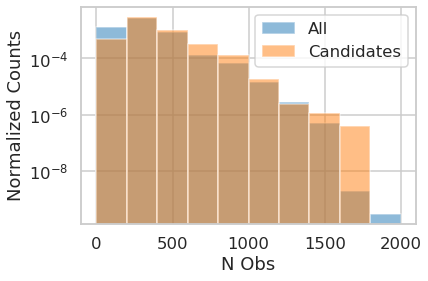

In [164]:
plt.hist(green_gaia['ztf_n_obs'],bins=[0,200,400,600,800,1000,1200,1400,1600,1800,2000], 
         log=True, density=True, alpha=.5,label='All')
plt.hist(stats_gaia['ztf_n_obs'],bins=[0,200,400,600,800,1000,1200,1400,1600,1800,2000], 
         log=True, density=True, alpha=.5,label='Candidates')
plt.xlabel('N Obs')
plt.ylabel('Normalized Counts')
plt.legend()

Text(0, 0.5, 'N Obs')

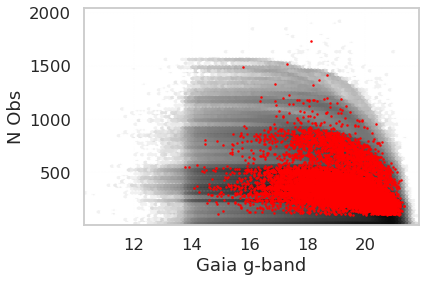

In [191]:
plt.hexbin(green_gaia['phot_g_mean_mag'],green_gaia['ztf_n_obs'], bins='log',cmap='binary')
plt.scatter(stats_gaia['phot_g_mean_mag'],stats_gaia['ztf_n_obs'], s=1, color='r')
plt.xlabel('Gaia g-band')
plt.ylabel('N Obs')

In [111]:
green_gaia_nobs = green_gaia.loc[green_gaia['ztf_n_obs']>100]

In [194]:
stats_gaia_nobs = stats_gaia.loc[stats_gaia['ztf_n_obs']>100]

In [195]:
len(stats_gaia) - len(stats_gaia_nobs)

0

In [ ]:
green_gaia = green_gaia.drop(columns=['ra_y', 'dec_y','ra_x', 'dec_x'])

Text(0, 0.5, 'Counts')

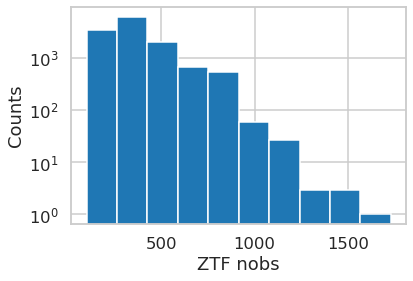

In [349]:
plt.hist(stats_gaia['ztf_n_obs'], log=True)
plt.xlabel('ZTF nobs')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

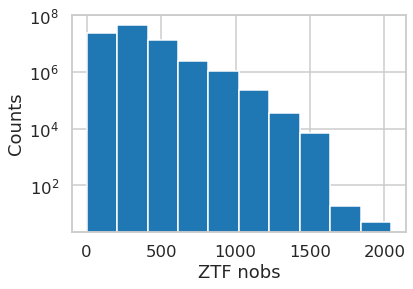

In [347]:
plt.hist(green_gaia['ztf_n_obs'], log=True)
plt.xlabel('ZTF nobs')
plt.ylabel('Counts')

Text(0, 0.5, 'ZTF nobs')

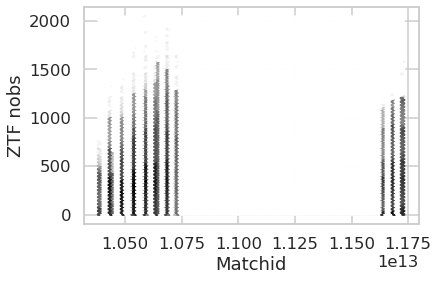

In [351]:
plt.hexbin(green_gaia['matchid'],green_gaia['ztf_n_obs'] , bins='log',cmap='binary')
plt.xlabel('Matchid')
plt.ylabel('ZTF nobs')

In [350]:
green_gaia.head()

matchid            source_id     bp_rp  phot_g_mean_mag  \
0  10435322156518  4260126628669270656  1.802952        19.529078   
1  10435322042113  4260126624385214080  2.158577        18.975090   
5  10435322142026  4260126937906960640  2.379248        20.254824   
6  10435322041693  4260126933620555136  1.812119        16.765156   
8  10435322116342  4260126937906955904  3.556435        18.341404   

   phot_g_mean_flux_over_error  phot_bp_mean_mag  phot_rp_mean_mag  a_g_val  \
0                   182.307449         19.999294         18.196342      NaN   
1                   276.302887         19.907875         17.749298      NaN   
5                   113.621567         20.957420         18.578173      NaN   
6                   876.244080         17.633398         15.821280      NaN   
8                   272.942993         20.355415         16.798981      NaN   

   parallax  parallax_error  lum_val       axsdist      dm_16      E_16  \
0 -0.095662        0.409760      NaN  4.600729e-07  12.614978  1.050425   
1  0.779127        0.266000      NaN  6.010644e-07  11.017821  1.039677   
5 -0.494582        0.742402      NaN  5.310926e-07  12.414134  1.378543   
6  0.488192        0.077859      NaN  6.276367e-07  11.177934  0.742131   
8 -0.811121        0.268087      NaN  1.038503e-06  13.293195  2.027949   

      Mr_16  FeH_16      dm_50      E_50  Mr_50  FeH_50      dm_84      E_84  \
0  1.875815   -0.70  14.036073  1.137076   2.75   -0.45  15.117517  1.239276   
1  2.925815   -0.60  11.827391  1.164479   4.10   -0.35  13.269290  1.274188   
5  1.800000   -0.70  13.720051  1.478382   2.90   -0.40  15.170022  1.584317   
6  3.100000   -0.60  11.417916  0.800902   3.35   -0.40  11.788458  0.837992   
8 -0.450000   -0.65  13.726082  2.067841   0.15   -0.45  14.420890  2.099801   

      Mr_84  FeH_84              gaia_id          ra       dec  ztf_n_obs  \
0  3.824185   -0.20  4260126628669270656  280.676054 -1.643882         44   
1  5.374185   -0.15  4260126624385214080  280.676568 -1.648677         95   
5  3.950000   -0.20  4260126937906960640  280.677176 -1.635635         21   
6  3.500000   -0.15  4260126933620555136  280.678004 -1.640589        145   
8  0.500000   -0.25                    0  280.678074 -1.635666         68   

   exploded_unique_matchids_index  unique_matchids_exploded        gal_x  \
0                               0            10435322156518 -2771.628483   
1                               0            10435322042113 -6300.665763   
5                               0            10435322142026 -3520.765237   
6                               0            10435321063851 -6644.393211   
8                               0            10435321050196 -3507.491294   

         gal_y       gal_z   abs_gal_z        gal_r  bp_rp_mag     g_mag  \
0  3252.660541  142.547410  142.547410  4273.373965   0.381550  6.255224   
1  1176.118282   68.677906   68.677906  6409.496335   0.645440  8.045874   
5  2812.777602  127.167241  127.167241  4506.384992   0.367938  7.797379   
6   974.219689   61.596759   61.596759  6715.434844   0.797106  5.839538   
8  2820.633157  127.367052  127.367052  4500.940633  -1.365903  6.650643   

        A_g      A_bp      A_rp  
0  2.213508  3.318785  1.897384  
1  2.149268  3.396274  1.883137  
5  2.606320  4.321975  2.310665  
6  1.603662  2.367099  1.352086  
8  3.376219  7.526959  2.604621

### Connecting Flare with Green&Gaia:

In [ ]:
stats_gaia = pd.merge(flare_candidate, green_gaia, how='inner', left_on='matchid',right_on='matchid')

In [ ]:
stats_gaia = stats_gaia.drop_duplicates(subset=['Mr_50','matchid','source_id'])

In [ ]:
stats_gaia = stats_gaia.drop(columns=['ra_y', 'dec_y','ztf_n_obs_y', 'exploded_unique_matchids_index_y','unique_matchids_exploded_y'])
stats_gaia = stats_gaia.rename(columns={'ra_x': 'ra', 'dec_x': 'dec', 'ztf_n_obs_x':'ztf_n_obs',
                                        'exploded_unique_matchids_index_x':'exploded_unique_matchids_index',
                                        'unique_matchids_exploded_x':'unique_matchids_exploded'})


In [59]:
len(stats_gaia)

12812

#this is from when the datadrame was how='outer'

#missinggreen = stats_green[stats_green['Mr_50'].isnull()]

#missinggreen_uniquematchid = missinggreen.pivot_table(index =['matchid'], aggfunc='size')
#missinggreen_uniquematchid_len = missinggreen_uniquematchid.loc[missinggreen_uniquematchid.values == 1]

#stats_ids_uniquematchid = stats_ids.pivot_table(index =['matchid'], aggfunc='size')
#stats_ids_uniquematchid_len = stats_ids_uniquematchid.loc[stats_ids_uniquematchid.values == 1]

This shows of the 8054 unique sources, 922 are not in the green data. This was determined from the code above. To re execute the code change stats_green to how='outer'

#plt.figure(figsize=(10,8))
#plt.plot(green_gaia['ra_x'],green_gaia['dec_x'], linestyle='none', marker='.', c='black', markersize=1, alpha=.2)
#plt.plot(stats_gaia['ra_x'],stats_gaia['dec_x'], linestyle='none', marker='.', c='red', markersize=5)

### Now determine which of the candidates are flares:

with pd.option_context('mode.use_inf_as_null', True):
    exp_comp = stats_green['exp_comp'].dropna()
len(exp_comp) # only 4 have inf values

AIC exponential comparison is $$e^{\frac{AIC_{flare} - AIC_{gauss}}{2}}$$
The value it gives mean how many times as probable the gauss model is to the flare model. An example being the comparison values is 0.5, meaning the gauss model us 1/2 as likely as the flare. Anything above 1 means gauss is more likely.

The given value to beat is $e^{-2}$ = 0.135

This value which was given in the wiki article, 'the e−2 likelihood interval is the same as the 0.954 confidence interval'

https://en.wikipedia.org/wiki/Likelihood_function#Likelihood_ratio_and_relative_likelihood

comp = np.exp((stats_gaia['aic_flare']-stats_gaia['aic_gauss'])/2)

with pd.option_context('mode.use_inf_as_null', True):
    comp = comp.dropna()
len(comp) # only 4 have inf values

plt.hist(comp.loc[comp.values<1])
print(len(comp.loc[comp.values<.05]))

plt.hist(flares['flare_end_diff'], bins=100)

#flares = stats_green.loc[np.exp((stats_green['aic_flare']-stats_green['aic_gauss'])/2) < np.exp(-2)]
flaretimelim = flare_candidate.loc[flare_candidate['flare_end_diff'].astype(float) < 0.005]
flaretimelim

(array([1.2798e+04, 9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ -2922.81068592,  55651.36996674, 114225.55061941, 172799.73127207,
        231373.91192473, 289948.0925774 , 348522.27323006, 407096.45388272,
        465670.63453539, 524244.81518805, 582818.99584071]),
 <a list of 10 Patch objects>)

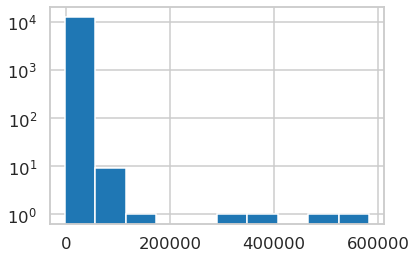

In [209]:
plt.hist(stats_gaia['equivdur'], log=True)

### Converting to Galactic Coordinates

The galactic coordinates are $(l,b)$. $l$ is the angle clockwise away from the galactic center. $b$ is the angle away from the galactic plan. Using angle $b$ and the distant modulus, I used sin($b$) = height about the galactiv plane / distant modulus or: height = $dm$sin($b$)

In [ ]:
def galactic_centric_coords(df):
    dist_pc = 10 ** ((df['dm_50'] +5) / 5)

    c = coord.ICRS(ra=df['ra'].values*u.degree, 
                   dec=df['dec'].values*u.degree, 
                   distance=dist_pc.values*u.pc)
    galactic = c.transform_to(coord.Galactocentric)     
    print(galactic)
    df['gal_x'] = galactic.x.value
    df['gal_y'] = galactic.y.value
    df['gal_z'] = galactic.z.value
    df['abs_gal_z'] = abs(galactic.z.value)
    df['gal_r'] = (galactic.x.value**2 + galactic.y.value**2)**.5
    
    
    return df

In [ ]:
stats_gaia = galactic_centric_coords(stats_gaia)
green_gaia = galactic_centric_coords(green_gaia)


In [60]:
green_gaia.head()

matchid            source_id     bp_rp  phot_g_mean_mag  \
0  10435322156518  4260126628669270656  1.802952        19.529078   
1  10435322042113  4260126624385214080  2.158577        18.975090   
5  10435322142026  4260126937906960640  2.379248        20.254824   
6  10435322041693  4260126933620555136  1.812119        16.765156   
8  10435322116342  4260126937906955904  3.556435        18.341404   

   phot_g_mean_flux_over_error  phot_bp_mean_mag  phot_rp_mean_mag  a_g_val  \
0                   182.307449         19.999294         18.196342      NaN   
1                   276.302887         19.907875         17.749298      NaN   
5                   113.621567         20.957420         18.578173      NaN   
6                   876.244080         17.633398         15.821280      NaN   
8                   272.942993         20.355415         16.798981      NaN   

   parallax  parallax_error  lum_val       axsdist      dm_16      E_16  \
0 -0.095662        0.409760      NaN  4.600729e-07  12.614978  1.050425   
1  0.779127        0.266000      NaN  6.010644e-07  11.017821  1.039677   
5 -0.494582        0.742402      NaN  5.310926e-07  12.414134  1.378543   
6  0.488192        0.077859      NaN  6.276367e-07  11.177934  0.742131   
8 -0.811121        0.268087      NaN  1.038503e-06  13.293195  2.027949   

      Mr_16  FeH_16      dm_50      E_50  Mr_50  FeH_50      dm_84      E_84  \
0  1.875815   -0.70  14.036073  1.137076   2.75   -0.45  15.117517  1.239276   
1  2.925815   -0.60  11.827391  1.164479   4.10   -0.35  13.269290  1.274188   
5  1.800000   -0.70  13.720051  1.478382   2.90   -0.40  15.170022  1.584317   
6  3.100000   -0.60  11.417916  0.800902   3.35   -0.40  11.788458  0.837992   
8 -0.450000   -0.65  13.726082  2.067841   0.15   -0.45  14.420890  2.099801   

      Mr_84  FeH_84              gaia_id          ra       dec  ztf_n_obs  \
0  3.824185   -0.20  4260126628669270656  280.676054 -1.643882         44   
1  5.374185   -0.15  4260126624385214080  280.676568 -1.648677         95   
5  3.950000   -0.20  4260126937906960640  280.677176 -1.635635         21   
6  3.500000   -0.15  4260126933620555136  280.678004 -1.640589        145   
8  0.500000   -0.25                    0  280.678074 -1.635666         68   

   exploded_unique_matchids_index  unique_matchids_exploded        gal_x  \
0                               0            10435322156518 -2771.628483   
1                               0            10435322042113 -6300.665763   
5                               0            10435322142026 -3520.765237   
6                               0            10435321063851 -6644.393211   
8                               0            10435321050196 -3507.491294   

         gal_y       gal_z   abs_gal_z        gal_r  bp_rp_mag     g_mag  \
0  3252.660541  142.547410  142.547410  4273.373965   0.381550  6.255224   
1  1176.118282   68.677906   68.677906  6409.496335   0.645440  8.045874   
5  2812.777602  127.167241  127.167241  4506.384992   0.367938  7.797379   
6   974.219689   61.596759   61.596759  6715.434844   0.797106  5.839538   
8  2820.633157  127.367052  127.367052  4500.940633  -1.365903  6.650643   

        A_g      A_bp      A_rp  
0  2.213508  3.318785  1.897384  
1  2.149268  3.396274  1.883137  
5  2.606320  4.321975  2.310665  
6  1.603662  2.367099  1.352086  
8  3.376219  7.526959  2.604621

### To determine the luminosity inorder to get the equivduration 

This equation was created for gaia fluxes by Jim

def LUM(gflux, plx, zp='AB', mag='G'):
    #from https://www.cosmos.esa.int/web/gaia/iow_20180316
    G0 = 25.7915509947 # AB_ZP mag

    #from Table 5.4: https://gea.esac.esa.int/archive/documentation/GDR2/Data_processing/chap_cu5pho
    #/sec_cu5pho_calibr/ssec_cu5pho_calibr_extern.html
    lp = 623.06 * u.nm # pivot wavelength of G filter

    m_G = -2.5 * np.log10(gflux) + G0
    F_AB_JY = 3631 * 10**(-0.4 * m_G)
    F_AB = F_AB_JY  * 1e-23 * u.erg/u.s/u.cm/u.cm/u.Hz

    dist = (1000./plx) * u.pc
    L = ((F_AB * dist**2) * (const.c/lp).to('Hz')).to(u.erg / u.s)
    return L.value

#And then you can call it like this:
LL = LUM(gaialim['phot_g_mean_flux'].values, gaialim['parallax'].values)

### How to get luminosity:

$$dm = m - M = 5 log(d) - 5$$
$$dm = m - M = 5 log(d) - 5 + A$$
$$M_2 - M_1 = 2.5 log(f_1 /f_2)$$
$$L = f 4 \pi d^2$$


<br> This is the paper for Pan-STARRS1: https://arxiv.org/pdf/1203.0297.pdf. It describes the use and equations of the AB magnitude system. It also gives the Pivot Wavelength for the r band as: 617nm

(The AB mag system is originally found in http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1983ApJ...266..713O&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf)

$$m_{ab}(v) = −2.5 log(f_ν/3631 Jy)$$
$$m_{ab}(v) = −48.600 − 2.5 log(f_ν[erg/sec/cm2/Hz]) $$

Solve for flux 

<br> So for if we plug in the absolute magnituded given by G19 we will get the flux at 10 parsec
<br> Rearanged for flux the equation is:
$$f_{10pc} = 10 ^ {\frac{M + 48.6}{-2.5}}$$

<br> This gives the flux based on frequency. We need it to be based off wavelength so we need the pivot wavelength of the band to convert it.

$$<f_v> = <f_{\lambda}>\frac{\lambda_p^2}{c} $$ 
$$<f_{\lambda}> = <f_v>\frac{c}{\lambda_p^2}$$

<br> $f_v$ and $f_{\lambda}$ are flux per something, either frequency or wavelength. So to have just the flux value I beleive you can have $f_{\lambda}*\lambda_p$ which gives it the units of flux. In this case the the equation for flux is then:
$$f = f_{\lambda}*\lambda_p$$
$$f = <f_v>\frac{c}{\lambda_p}$$
$$f = 10 ^ {\frac{M + 48.6}{-2.5}} *\frac{c}{\lambda_p}$$


In [ ]:
def LUM(M_r):
    '''
    This function produces the luminosity of a star based off of its absolute magnitude.
    This function works in the AB Magnitude system and is catered for the PanSTARRS r band.
    This can be altered to work for any band by changing the pivot wavelength. 
    '''
    flux_nu = 10 ** ((M_r + 48.6) / -2.5)
    flux_nu = flux_nu * (u.erg/u.s/u.cm/u.cm/u.Hz)
    #Band used is r from Pan-STARRS 1 as described in Green19 
    lp = 617 * u.nanometer #pivot wavelength for the band used
    flux_lambda = flux_nu * const.c / lp 
    lum = flux_lambda *  4 * np.pi * (10 * u.parsec) ** 2
    #16.847 − 2.5 log
    #m  = 16.847 − 2.5 log(fγ[ph/sec/cm2/dln λ]). 
    
    return lum.to(u.erg/u.s)

### Determine flare rate by spectral type

Spectral type will be given by Mr_50 but I dont really know what that means.

Need to correct Mr for reddening?  A_V = Constance * E(B-V), where A_V is extinction and E(B-V) is reddening. 

Taken from the green paper:

A(E) is the extinction in the observed passbands, assumed to be a linear function of reddening, E. We assume that for each star, extinction is given by A(E) = E * R 

E, the extinction, is given by the Green data. We used Mr so the R values we use is 2.617 (take from table 1 in the green paper). So E * 2.617 gives the reddening.

https://arxiv.org/pdf/1905.02734.pdf

Have the machinary for log luminosites, flare energy, and then work on the flare frequency diagram, make andother color magnitudes, make flare selections 


need to know: t_exposure (number of obs * esposure time)
    frequency diagram: log nu (number of flares /day)
    sorted by flare energry ( flare_energrysssort()(ii-1) this sorts big to small, this is x array
    y array- np.arange(1,n+i)/total observed time in days, this is a counting array scalled by observatuiontime 
    plot 
    log everything
    
    binthe CMD, make contours, there should be equal number of flares per bin
    plot frequ:do this for each bin of cmb
    

### Extinction
Gaia DR2 paper with extinction info: https://www.aanda.org/articles/aa/pdf/2018/08/aa32843-18.pdf

The original paper that shows where the equations are derived from: https://arxiv.org/pdf/1802.01670.pdf

Using the magnitudes from gaia we will use these equations:
$$k_X = c_1 + c_2(G_{BP} − G_{RP})_0 + c_3(G_{BP} − G_{RP})^2_0 + c_4(G_{BP} − G_{RP})^3_0+c_5A_0 + c_6A^2_0 + c_7(G_{BP} − G_{RP})_0A_0$$


$$k_X = A_X/A_0$$
$A_0$ is defined as the interstellar extinction at $\lambda$ = 555 nm
$$A_0 = 3.1~E(B − V)$$
So the extinction factor is: $A_X = k_X*A_0 = k_X * 3.1 ~E(B − V)$

We will use the reddening values, E, given by G19. 

To determine the absolute magnitudes including extinction use this distance modulus:
$$dm = m_{\lambda}-M_{\lambda}=5 log(r_{pc}) - 5 + A_{\lambda}$$
Rearranged for M:
$$M_{\lambda} = m_{\lambda} - 5 log(r_{pc}) + 5 - A_{\lambda}$$

Since the distance modulus is wavelength depended I will have to take that into account. I start with the green dm but since I am using gaia data I will need to convert it.

$$dm_{green} = 5 log(r_{pc}) - 5 + A_{green} \Rightarrow dm_{green} - A_{green}= 5 log(r_{pc}) - 5 $$
$$dm_{gaia} = 5 log(r_{pc}) - 5 + A_{gaia} \Rightarrow dm_{gaia} - A_{gaia}= 5 log(r_{pc}) - 5 $$
$$dm_{gaia} - A_{gaia} = dm_{green} - A_{green} \Rightarrow dm_{gaia} = dm_{green} - A_{green} + A_{gaia} $$
$$dm_{gaia} = m_{gaia} - M{gaia}$$
$$M_{gaia} = m_{gaia} - dm_{gaia}$$
$$M_{gaia} = m_{gaia} - (dm_{green} - A_{green} + A_{gaia})$$

To get $A_{green}$ use the coefficient given in the green paper for the r band and multipy it by the extinction: $A_{green}$ = 2.617 * $E(B − V)_{green}$


In [ ]:
def extinction_coef(GBP, GRP, A0, c1, c2, c3, c4, c5, c6, c7):
    k = (c1 + c2*(GBP - GRP) + c3*(GBP - GRP)**2 + c4*(GBP - GRP)**3
         + c5*A0 + c6*A0**2 + c7*(GBP - GRP)*A0)
    return k

In [ ]:
def cmd_mags(df):
    
    g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7 = [0.9761, -0.1704, 0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7 = [1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7 = [0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    
    A_0 = 3.1 * df['E_50']
    A_green = 2.617 * df['E_50']
    
    k_g = extinction_coef(df['phot_bp_mean_mag'],df['phot_rp_mean_mag'],A_0,g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7)
    A_g = k_g * A_0
    k_bp = extinction_coef(df['phot_bp_mean_mag'],df['phot_rp_mean_mag'],A_0,bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7)
    A_bp = k_bp * A_0
    k_rp = extinction_coef(df['phot_bp_mean_mag'],df['phot_rp_mean_mag'],A_0,rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7)
    A_rp = k_rp * A_0
    
    #Need to check in how to use the mean mag
    g_mag_value = df['phot_g_mean_mag'] - df['dm_50'] - A_g + A_green
    bp_mag_value = df['phot_bp_mean_mag'] - df['dm_50'] - A_bp + A_green
    rp_mag_value = df['phot_rp_mean_mag'] - df['dm_50'] - A_rp + A_green
    bp_rp_mag_value = bp_mag_value - rp_mag_value
    
    df['bp_rp_mag'] = bp_rp_mag_value
    df['g_mag'] = g_mag_value
    df['A_g'] = A_g
    df['A_bp'] = A_bp
    df['A_rp'] = A_rp


    return df

In [ ]:
#for each bin make a frequency plot:
def plotenergyfreq(df_flare, df_all):
    lum = LUM(df_flare['Mr_50'].values)
    energy = lum.value * df_flare['equivdur']
    df_new = df_flare
    df_new['lum'] = np.log10(lum.value)
    df_new['flare_energy'] = np.log10(energy)

    df_new = df_new.sort_values(by=['flare_energy'],ascending=False)
    totaltime = np.sum(df_all['ztf_n_obs'])*30 #this is in seconds of exposure time
    rate = np.arange(1, len(df_new) +1) / totaltime
    #print(rate,df_new['flare_energy'])
    plt.ylabel('$\\nu$ flares/day', size=15)
    plt.xlabel('Flare Energy [log10(erg)]')
    plt.plot(df_new['flare_energy'],np.log10(rate))
    plt.show()
    return df_new



In [ ]:
flare_energy = plotenergyfreq(stats_gaia, green_gaia)

In [63]:
len(flare_energy_limfinal)

202

In [ ]:
flare_energy = cmd_mags(flare_energy)
green_gaia = cmd_mags(green_gaia)

In [ ]:
flare_energy_limfinal = flare_energy.loc[(flare_energy['flare_end_diff']>0.05) &
                                         (flare_energy['E_50']>0) &
                                         (flare_energy['A_bp']<1) &
                                         (flare_energy['A_rp']<1) &
                                         (flare_energy['dof_flare']>15) &
                                         ((flare_energy['red_gauss'] - flare_energy['red_flare']) / flare_energy['red_flare'] > .5)
                                        ]   

/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/epyc/opt/anaconda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/epyc/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


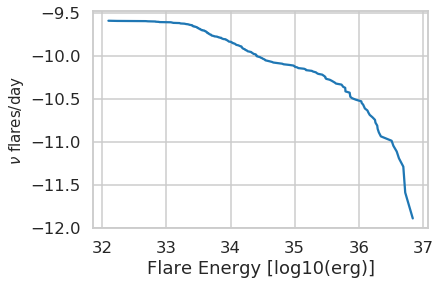

matchid          ra        dec  ztf_n_obs  \
4129   10540012146549  293.871599   8.934379        317   
6405   10591042030035  297.211739  16.458136        499   
8876   10638121047103  283.242868  23.338629        280   
5050   10541521079357  300.263862  14.665835        225   
4478   10541442089063  296.210961  13.531388        266   
...               ...         ...        ...        ...   
10303  10685561026721  289.506085  36.291985        376   
8583   10638252055041  283.787966  26.006203        356   
2910   10538121068797  275.741773   9.110747        351   
3037   10538231027851  278.855424  10.295201        354   
4722   10541551001649  300.134410  14.595202        286   

       exploded_unique_matchids_index  unique_matchids_exploded  \
4129                                0            10540012146549   
6405                                0            10591042030035   
8876                                0            10638122036262   
5050                                1            10541522090383   
4478                                1            10541442089063   
...                               ...                       ...   
10303                               0            10685562056385   
8583                                1            10638252055041   
2910                                1            10538122087959   
3037                                1            10538232031110   
4722                                1            10541552066450   

                                 match_file      id  aic_flare  chi_flare  \
4129   ztf_000540_zr_c01_q2_match_programid  146549  64.672686  56.672687   
6405   ztf_000591_zr_c02_q1_match_programid   30035  19.926185  11.926185   
8876   ztf_000638_zr_c04_q1_match_programid   36262  76.574831  68.574830   
5050   ztf_000541_zr_c14_q1_match_programid   90383  89.903342  81.903342   
4478   ztf_000541_zr_c12_q1_match_programid   89063  23.918335  15.918335   
...                                     ...     ...        ...        ...   
10303  ztf_000685_zr_c15_q1_match_programid   56385  18.205427  10.205427   
8583   ztf_000638_zr_c07_q2_match_programid   55041  13.725688   5.725688   
2910   ztf_000538_zr_c04_q1_match_programid   87959  22.981976  14.981976   
3037   ztf_000538_zr_c06_q4_match_programid   31110  22.782263  14.782263   
4722   ztf_000541_zr_c14_q4_match_programid   66450  86.050024  78.050024   

       dof_flare  red_flare   aic_gauss   chi_gauss  dof_gauss  red_gauss  \
4129          18   3.148483  148.868260  140.868264         18   7.826015   
6405          44   0.271050  119.923965  111.923965         44   2.543726   
8876          60   1.142914  454.400388  446.400386         60   7.440006   
5050          38   2.155351  166.913210  158.913212         38   4.181927   
4478          25   0.636733   41.945391   33.945392         25   1.357816   
...          ...        ...         ...         ...        ...        ...   
10303         27   0.377979   34.374405   26.374405         27   0.976830   
8583          29   0.197438   17.711954    9.711954         29   0.334895   
2910          29   0.516620   33.476734   25.476734         29   0.878508   
3037          32   0.461946   54.063808   46.063808         32   1.439494   
4722          28   2.787501  207.266585  199.266587         28   7.116664   

           exp_comp   perc_comp                fl_indx     equivdur      xpos  \
4129   1.917948e+18   84.195575             [55 56 57]    95.322633  3008.160   
6405   5.178955e+21   99.997780      [175 176 177 178]   576.840861  2619.048   
8876   1.106057e+82  377.825557  [157 158 159 160 161]  4401.832662  1385.896   
5050   5.278135e+16   77.009869          [81 82 83 84]  3727.389935  1701.124   
4478   8.213448e+03   18.027056             [62 63 64]   107.999904  2489.080   
...             ...         ...                    ...          ...       ...   
10303  3.243761e+03   16.168978             [84 85 86]    64.185692  2402.292   
85

In [64]:
plotenergyfreq(flare_energy_limfinal, green_gaia)

### Make CMD

#### Bins

In [ ]:
def Bins(df,column='Mr_50',n_bins=5): 
    df_sort = df.sort_values(by=[column],ascending=True)
    df_sort = df_sort.reset_index()
    bins = [df_sort[column].values[0]]
    len_df = len(df_sort)
    for i in np.arange(n_bins)+1:
        bin_edge = df_sort[column].values[int(len_df / n_bins * i - 1)]
        bins = np.append(bins, bin_edge)
    return bins

In [ ]:
#  MIST isochrones
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = 'MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
#MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.))[0][::-1]
                    #&                     (mist['Gaia_G_DR2Rev'] > 2))

In [ ]:
mist.head()

In [ ]:
flare_energy_limfinal.head()

In [ ]:
bins_Mrlim = Bins(flare_energy_limfinal)
bins_Mrlim

In [ ]:
bins_glim = Bins(flare_energy_limfinal,column='g_mag')
bins_glim

In [ ]:
plt.hist(flare_energy_limfinal['g_mag'])
plt.hist(flare_energy_limfinal['Mr_50'], alpha=.5)

In [339]:
mist_mw = mist.loc[((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.))]
                   #Mass_cuts = np.interp(mist['Bessell_R'], mist['star_mass'], bins_Mrlim)

#Should give 4 masses. Goal: put them on the plot
mist_mw.loc[(mist_mw['Gaia_G_DR2Rev']>12.4) & (mist_mw['Gaia_G_DR2Rev']<12.6)]['star_mass']

66543    0.183186
66544    0.183467
66545    0.183747
Name: star_mass, dtype: float64

In [65]:
masses = [1.758517, 0.840185, 0.508649, 0.384684, 0.308634, 0.183747]

In [75]:
mist_ms2 = np.where((mist['star_mass']<=1) & 
                    (mist['log10_isochrone_age_yr'] == 9.))[0][::-1]
                    #&                     (mist['Gaia_G_DR2Rev'] > 2))

In [76]:
mist['Gaia_BP_DR2Rev'].values[mist_ms2]

array([ 1.0101984e+01,  1.0073555e+01,  1.0014084e+01,  9.9542800e+00,
        9.8894920e+00,  9.8298550e+00,  9.7687130e+00,  9.7208320e+00,
        9.6560080e+00,  9.5950590e+00,  9.5585160e+00,  9.4954150e+00,
        9.4401480e+00,  9.3764770e+00,  9.3249460e+00,  9.2641470e+00,
        9.2126750e+00,  9.1803770e+00,  9.1362550e+00,  9.0853630e+00,
        9.0417820e+00,  8.9937830e+00,  8.9533520e+00,  8.9305450e+00,
        8.8863390e+00,  8.8499860e+00,  8.8069930e+00,  8.7698970e+00,
        8.7337360e+00,  8.7005120e+00,  8.6736050e+00,  8.6328410e+00,
        8.5827050e+00,  8.5139980e+00,  8.4661450e+00,  8.3813840e+00,
        8.2876260e+00,  8.1791460e+00,  8.0897730e+00,  7.9853830e+00,
        7.9018600e+00,  7.8251150e+00,  7.7539190e+00,  7.7031200e+00,
        7.6477380e+00,  7.6041390e+00,  7.5602320e+00,  7.5122410e+00,
        7.4697030e+00,  7.4426340e+00,  7.3658190e+00,  7.3163830e+00,
        7.2844340e+00,  7.2102990e+00,  7.1544010e+00,  7.1041940e+00,
      

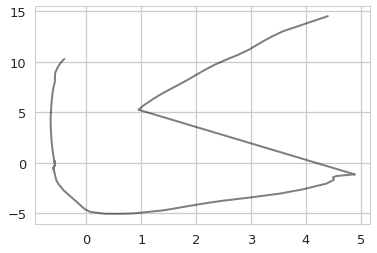

In [77]:
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms2] - mist['Gaia_RP_DR2Rev'].values[mist_ms2], 
         mist['Gaia_G_DR2Rev'].values[mist_ms2], c='black', lw=2, alpha=0.5, label = '1 Gyr MIST')

In [715]:
print(bins_Mrlim, bins_Mrlim[1])

[-0.65, 5.15, 8.85, 10.2, 11.25, 15.9] 5.15


In [327]:
len(green_gaia_lim)

10689996

In [ ]:
green_gaia_lim = green_gaia.loc[(green_gaia['E_50']>0) &
                                (green_gaia['A_bp']<.5) &
                                (green_gaia['A_rp']<.5)]

# Create CMD

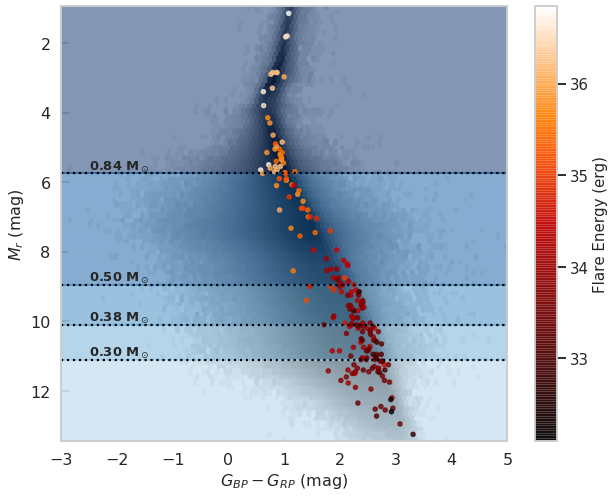

In [66]:
#LL = LUM(df['Mr_50'].values)
masses = [1.758517, 0.840185, 0.508649, 0.384684, 0.308634, 0.183747]
labelsize = 16

fig = plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=labelsize)
plt.ylabel('$M_r$ (mag)', size=labelsize)

#make the lines the same color as the 
colormap=cm.Blues_r
normalize = mcolors.Normalize(vmin=0, vmax=len(bins_Mrlim))

plt.axhline(y=bins_Mrlim[1], color='k', linestyle=':')
plt.axhline(y=bins_Mrlim[2], color='k', linestyle=':')
plt.axhline(y=bins_Mrlim[3], color='k', linestyle=':')
plt.axhline(y=bins_Mrlim[4], color='k', linestyle=':')
#legend = plt.legend()
#plt.setp(legend.get_texts(), color='k')

plt.hexbin(green_gaia_lim['bp_rp_mag'], green_gaia_lim['Mr_50'], bins='log', cmap='binary')
plt.fill_between([-3,5], bins_Mrlim[0]-.2, bins_Mrlim[1],color=colormap(normalize(0)), alpha=0.5)
plt.fill_between([-3,5], bins_Mrlim[1], bins_Mrlim[2],color=colormap(normalize(1)), alpha=0.5)
plt.fill_between([-3,5], bins_Mrlim[2], bins_Mrlim[3],color=colormap(normalize(2)), alpha=0.5)
plt.fill_between([-3,5], bins_Mrlim[3], bins_Mrlim[4],color=colormap(normalize(3)), alpha=0.5)
plt.fill_between([-3,5], bins_Mrlim[4], bins_Mrlim[5]+.2,color=colormap(normalize(4)), alpha=0.5)

plt.text(-2.5,bins_Mrlim[1]-.1,'0.84 M$_\odot$', fontsize=13, weight='bold')
plt.text(-2.5,bins_Mrlim[2]-.1,'0.50 M$_\odot$', fontsize=13, weight='bold')
plt.text(-2.5,bins_Mrlim[3]-.1,'0.38 M$_\odot$', fontsize=13, weight='bold')
plt.text(-2.5,bins_Mrlim[4]-.1,'0.30 M$_\odot$', fontsize=13, weight='bold')

plt.ylim(bins_Mrlim[0]-.2,bins_Mrlim[5]+.2)
plt.xlim(-3,5)

plt.scatter(flare_energy_limfinal['bp_rp_mag'], flare_energy_limfinal['Mr_50'], 
            alpha=0.75, s=16, c=flare_energy_limfinal['flare_energy'],
            cmap=plt.cm.get_cmap('gist_heat'), label='Flaring Stars')

cb = plt.colorbar()
cb.set_label('Flare Energy (erg)',fontsize=labelsize-1)

cb.ax.tick_params(labelsize=labelsize-1) 

plt.tick_params(axis='both', labelsize=labelsize, size=7)

plt.gca().invert_yaxis()

#fig.savefig(f'final_plots/final_CMD.png', dpi=350, bbox_inches = "tight", pad_inches=.25)


# Create Color vs Apparent Mag 

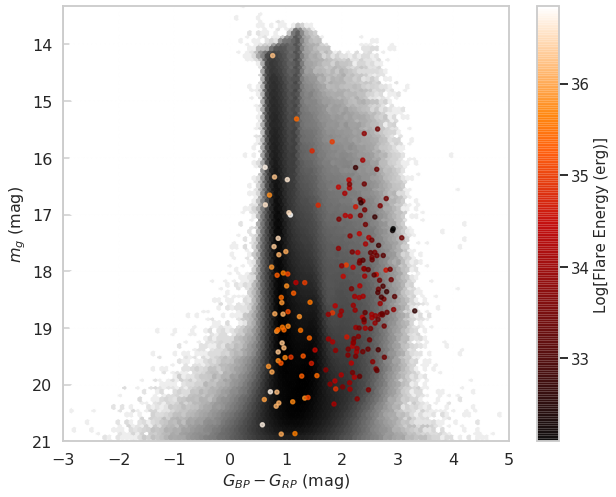

In [198]:
#LL = LUM(df['Mr_50'].values)
labelsize = 16

fig = plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=labelsize)
plt.ylabel('$m_g$ (mag)', size=labelsize)

plt.hexbin(green_gaia_lim['bp_rp_mag'], green_gaia_lim['phot_g_mean_mag'], bins='log', cmap='binary')

#plt.ylim(bins_Mrlim[0]-.2,bins_Mrlim[5]+.2)
plt.xlim(-3,5)

plt.scatter(flare_energy_limfinal['bp_rp_mag'], flare_energy_limfinal['phot_g_mean_mag'], 
            alpha=0.75, s=16, c=flare_energy_limfinal['flare_energy'],
            cmap=plt.cm.get_cmap('gist_heat'), label='Flaring Stars')

cb = plt.colorbar()
cb.set_label('Log[Flare Energy (erg)]',fontsize=labelsize-1)

cb.ax.tick_params(labelsize=labelsize-1) 

plt.tick_params(axis='both', labelsize=labelsize, size=7)

plt.gca().invert_yaxis()

#fig.savefig(f'final_plots/final_CMD.png', dpi=350, bbox_inches = "tight", pad_inches=.25)


In [389]:
def seperate_fields(df):
    f436 = df.loc[(df['unique_matchids_exploded'] > 10436000000000) & (df['unique_matchids_exploded'] < 10437000000000)]
    f437 = df.loc[(df['unique_matchids_exploded'] > 10437000000000) & (df['unique_matchids_exploded'] < 10438000000000)]
    f488 = df.loc[(df['unique_matchids_exploded'] > 10488000000000) & (df['unique_matchids_exploded'] < 10489000000000)]
    f489 = df.loc[(df['unique_matchids_exploded'] > 10489000000000) & (df['unique_matchids_exploded'] < 10490000000000)]
    f538 = df.loc[(df['unique_matchids_exploded'] > 10538000000000) & (df['unique_matchids_exploded'] < 10539000000000)]
    f539 = df.loc[(df['unique_matchids_exploded'] > 10539000000000) & (df['unique_matchids_exploded'] < 10540000000000)]
    f540 = df.loc[(df['unique_matchids_exploded'] > 10540000000000) & (df['unique_matchids_exploded'] < 10541000000000)]
    f541 = df.loc[(df['unique_matchids_exploded'] > 10541000000000) & (df['unique_matchids_exploded'] < 10542000000000)]
    f591 = df.loc[(df['unique_matchids_exploded'] > 10591000000000) & (df['unique_matchids_exploded'] < 10592000000000)]
    f592 = df.loc[(df['unique_matchids_exploded'] > 10592000000000) & (df['unique_matchids_exploded'] < 10593000000000)]
    f638 = df.loc[(df['unique_matchids_exploded'] > 10638000000000) & (df['unique_matchids_exploded'] < 10639000000000)]
    f639 = df.loc[(df['unique_matchids_exploded'] > 10639000000000) & (df['unique_matchids_exploded'] < 10640000000000)]
    f685 = df.loc[(df['unique_matchids_exploded'] > 10685000000000) & (df['unique_matchids_exploded'] < 10686000000000)]
    f686 = df.loc[(df['unique_matchids_exploded'] > 10686000000000) & (df['unique_matchids_exploded'] < 10687000000000)]
    return f436, f437, f488, f489, f538, f539, f540, f541, f591, f592, f638, f639, f685, f686


In [103]:
f436, f437, f488, f489, f538, f539, f540, f541, f591, f592, f638, f639, f685, f686 = field(flare_lim)
fall436, fall437, fall488, fall489, fall538, fall539, fall540, fall541, fall591, fall592, fall638, fall639, fall685, fall686 = field(green_gaia)

ratef436 = np.arange(1, len(f436) +1) /  np.sum(fall436['ztf_n_obs'])*30
ratef437 = np.arange(1, len(f437) +1) /  np.sum(fall437['ztf_n_obs'])*30
ratef488 = np.arange(1, len(f488) +1) /  np.sum(fall488['ztf_n_obs'])*30
ratef489 = np.arange(1, len(f489) +1) /  np.sum(fall489['ztf_n_obs'])*30
ratef538 = np.arange(1, len(f538) +1) /  np.sum(fall538['ztf_n_obs'])*30
ratef539 = np.arange(1, len(f539) +1) /  np.sum(fall539['ztf_n_obs'])*30
ratef540 = np.arange(1, len(f540) +1) /  np.sum(fall540['ztf_n_obs'])*30
ratef541 = np.arange(1, len(f541) +1) /  np.sum(fall541['ztf_n_obs'])*30
ratef591 = np.arange(1, len(f591) +1) /  np.sum(fall591['ztf_n_obs'])*30
ratef592 = np.arange(1, len(f592) +1) /  np.sum(fall592['ztf_n_obs'])*30
ratef638 = np.arange(1, len(f638) +1) /  np.sum(fall638['ztf_n_obs'])*30
ratef639 = np.arange(1, len(f639) +1) /  np.sum(fall639['ztf_n_obs'])*30
ratef685 = np.arange(1, len(f685) +1) /  np.sum(fall685['ztf_n_obs'])*30
ratef686 = np.arange(1, len(f686) +1) /  np.sum(fall686['ztf_n_obs'])*30

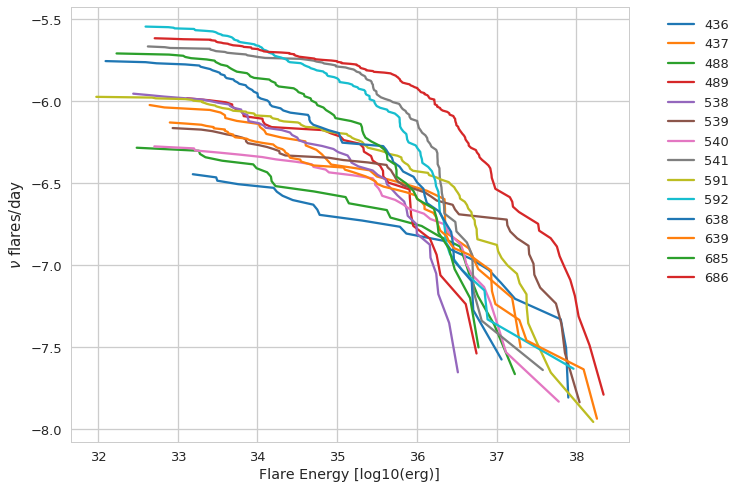

In [104]:
plt.figure(figsize=(10,8))
plt.ylabel('$\\nu$ flares/day', size=15)
plt.xlabel('Flare Energy [log10(erg)]')
plt.plot(f436['flare_energy'],np.log10(ratef436), label="436")
plt.plot(f437['flare_energy'],np.log10(ratef437), label="437")
plt.plot(f488['flare_energy'],np.log10(ratef488), label="488")
plt.plot(f489['flare_energy'],np.log10(ratef489), label="489")
plt.plot(f538['flare_energy'],np.log10(ratef538), label="538")
plt.plot(f539['flare_energy'],np.log10(ratef539), label="539")
plt.plot(f540['flare_energy'],np.log10(ratef540), label="540")
plt.plot(f541['flare_energy'],np.log10(ratef541), label="541")
plt.plot(f591['flare_energy'],np.log10(ratef591), label="591")
plt.plot(f592['flare_energy'],np.log10(ratef592), label="592")
plt.plot(f638['flare_energy'],np.log10(ratef638), label="638")
plt.plot(f639['flare_energy'],np.log10(ratef639), label="639")
plt.plot(f685['flare_energy'],np.log10(ratef685), label="685")
plt.plot(f686['flare_energy'],np.log10(ratef686), label="686")

plt.legend(bbox_to_anchor = (1.2, 1.0))

In [338]:
def ffdiagram_binned(df_flare, df_all, xaxis='flare_energy', bins=None, n_bins=5, bin_column='Mr_50', 
                     legendlabel='M$_r$',colormap=cm.Blues_r):
    
    '''
    df_flare: the 
    df_all:

    '''   
    #use bin function to get equal bins of flares
    if np.all(bins)==None:
        bins_flare = Bins(df_flare, column=bin_column, n_bins=n_bins)
    else:
        bins_flare = bins
    
    #make bins for all sources, 
    #dont want to miss max and min values outside of flare bins
    bins_all = [df_all[bin_column].min()]
    bins_all = np.append(bins_all, bins_flare[1:-1])
    bins_all = np.append(bins_all, df_all[bin_column].max())
    print()
    #set up plots CMRmap
    plt.figure(figsize=(7,7))
    plt.ylabel('log10($\\nu$ flares/day)', size=16)
    plt.xlabel(xaxis, size=15)
    
    #play with colors of plots, pick color based on bins
    normalize = mcolors.Normalize(vmin=0, vmax=n_bins)

    
    for i in range(n_bins):
        flare_inbin = df_flare.loc[(df_flare[bin_column] >= bins_flare[i]) & (df_flare[bin_column] < bins_flare[i+1])]
        all_inbin = df_all.loc[(df_all[bin_column] >= bins_all[i]) & (df_all[bin_column] < bins_all[i+1])]
        flare_energy = flare_inbin.sort_values(by=[xaxis],ascending=False)
        rate = np.arange(1, len(flare_inbin) +1) / (np.sum(all_inbin['ztf_n_obs']*30/60/60/24))
        color = colormap(normalize(i))
        plt.plot(flare_energy[xaxis], np.log10(rate), color=color, 
                 label='{} {:.1f} : {:.1f}'.format(legendlabel,bins_all[i],bins_all[i+1]))
        plt.tick_params(axis='both', labelsize=15, size=7)
        #print(len(flare_inbin),np.sum(all_inbin['ztf_n_obs']*30/60/60/24))
    #plt.legend(loc='upper right',fontsize=14)
    #fig.savefig(f'final_plots/final_ff_1plot_5magbin.png', dpi=350, bbox_inches = "tight",pad_inches=.25)


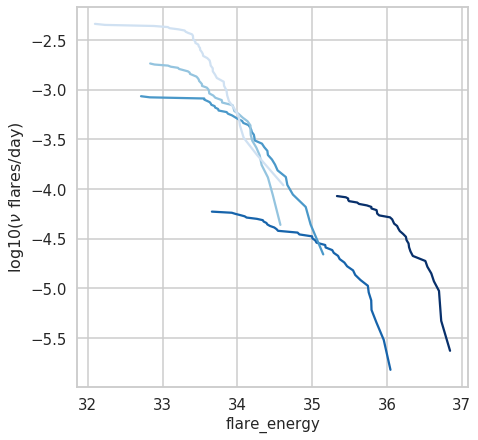

In [340]:
ffdiagram_binned(flare_energy_limfinal,green_gaia_lim,xaxis='flare_energy')

(array([2.150239e+06, 6.362982e+06, 1.516497e+06, 2.830190e+05,
        2.662760e+05, 6.906500e+04, 3.988500e+04, 2.007000e+03,
        2.400000e+01, 2.000000e+00]),
 array([1.0000e+00, 1.9340e+02, 3.8580e+02, 5.7820e+02, 7.7060e+02,
        9.6300e+02, 1.1554e+03, 1.3478e+03, 1.5402e+03, 1.7326e+03,
        1.9250e+03]),
 <a list of 10 Patch objects>)

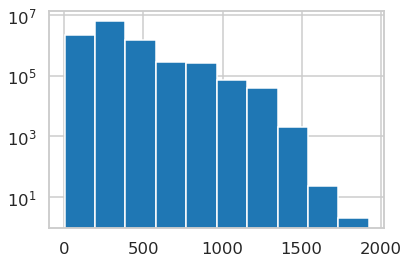

In [342]:
plt.hist(green_gaia_lim['ztf_n_obs'],log=True)

In [97]:
def nplot_ffdiagram_binned(df_flare, df_all, bins=None, n_bins=5, bin_column='Mr_50',
                           nplots=1, plot_bin_column='abs_gal_z', 
                           legendlabel='Mr',colormap=cm.viridis):
    
    '''
    df_flare: the 
    df_all: 
        fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
        fig.suptitle('Sharing both axes')
        axs[0].plot(x, y ** 2)
        axs[1].plot(x, 0.3 * y, 'o')
        axs[2].plot(x, y, '+')

    '''   
    
    plotbins_flare = Bins(df_flare, column=plot_bin_column, n_bins=nplots)    
    plotbins_all = [df_all[plot_bin_column].min()]
    plotbins_all = np.append(plotbins_all, plotbins_flare[1:-1])
    plotbins_all = np.append(plotbins_all, df_all[plot_bin_column].max())
    
    
    #use bin function to get equal bins of flares
    if np.all(bins)==None:
        bins_flare = Bins(df_flare, column=bin_column, n_bins=n_bins)
    else:
        bins_flare = bins
    
    #make bins for all sources, 
    #dont want to miss max and min values outside of flare bins
    bins_all = [df_all[bin_column].min()]
    bins_all = np.append(bins_all, bins_flare[1:-1])
    bins_all = np.append(bins_all, df_all[bin_column].max())
    bins_mass = [1.75, 0.84, 0.50, 0.38, 0.30, 0.18]

    
    fig, axs = plt.subplots(nplots,1,figsize=(7,15), sharey=True,sharex=True, gridspec_kw={'hspace': .14})
    #fig.suptitle('Flare Frequency Diagrams at Different Radii')
    #plt.legend(loc='upper right', borderaxespad=0.)

    #plt.ylabel('log10($\\nu$ flares/day)', size=15)
    
    #play with colors of plots, pick color based on bins
    normalize = mcolors.Normalize(vmin=0, vmax=n_bins+1)
    

    for j in range(nplots):
        flare_inplot = df_flare.loc[(df_flare[plot_bin_column] >= plotbins_flare[j]) & (df_flare[plot_bin_column] < plotbins_flare[j+1])]
        all_inplot = df_all.loc[(df_all[plot_bin_column] >= plotbins_all[j]) & (df_all[plot_bin_column] < plotbins_all[j+1])]
        for i in range(n_bins):
            flare_inbin = flare_inplot.loc[(flare_inplot[bin_column] >= bins_flare[i]) & (flare_inplot[bin_column] < bins_flare[i+1])]
            all_inbin = all_inplot.loc[(all_inplot[bin_column] >= bins_all[i]) & (all_inplot[bin_column] < bins_all[i+1])]
            flare_energy = flare_inbin.sort_values(by=['flare_energy'],ascending=False)
            rate = np.arange(1, len(flare_inbin) +1) / (np.sum(all_inbin['ztf_n_obs']*30))
            color = colormap(normalize(i))
            axs[j].set_title('{:.0f}< mr <{:.0f} pc'.format(bins_all[i],bins_all[i+1]))
            axs[j].plot(flare_energy['flare_energy'], np.log10(rate), color=color, 
                        label='{:.1f}< M$_r$ <{:.1f}'.format(plotbins_flare[j],plotbins_flare[j+1]))
            
            
            #axs[j].set_title('{:.1f}< M$_r$ <{:.1f} ({:.2f}M$_\odot$> Mass >{:.2f}M$_\odot$)'.format(plotbins_flare[j],plotbins_flare[j+1],bins_mass[j],bins_mass[j+1]))
            #axs[j].plot(flare_energy['flare_energy'], np.log10(rate), color=color, 
            #            label='{:.0f}< mr <{:.0f} pc'.format(bins_all[i],bins_all[i+1]))
            axs[j].set_ylabel('log10($\\nu$ flares/day)')
            axs[j].yaxis.label.set_size(16)
            axs[j].tick_params(axis='both', labelsize=15, size=7)
    
    axs[-1].set_xlabel('Flare Energy (log10(erg))')
    axs[-1].xaxis.label.set_size(15)
    axs[-1].tick_params(axis='both', labelsize=15)
    axs[0].legend()
    #axs[0].legend(labels=('{:.0f}< z <{:.0f} pc'.format(bins_all[0],bins_all[1]),
    #                     '{:.0f}< z <{:.0f} pc'.format(bins_all[1],bins_all[2]),
    #                     '{:.0f}< z '.format(bins_all[2])) ,fontsize=14)    
    #fig.savefig(f'final_plots/final_ff_5plot_3heightbin.png', dpi=350, bbox_inches = "tight",pad_inches=.25)



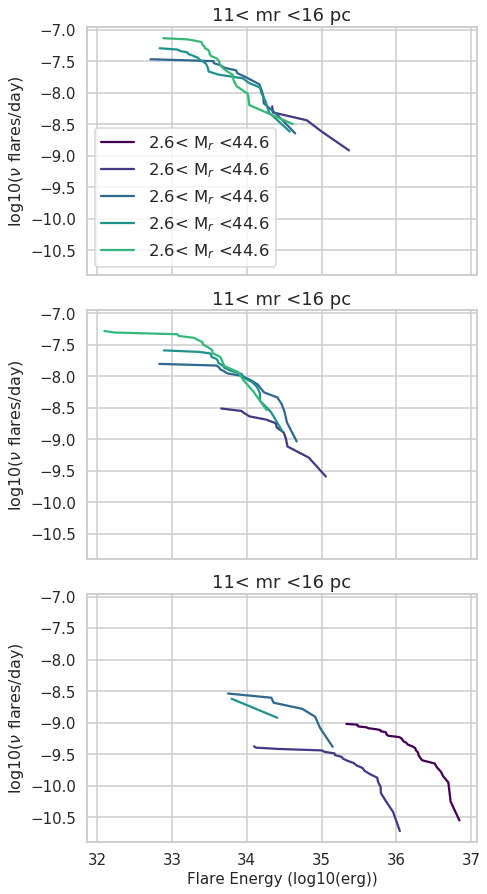

In [98]:
nplot_ffdiagram_binned(flare_energy_limfinal, green_gaia_lim, n_bins=5, bin_column='Mr_50',
                       nplots=3, plot_bin_column='abs_gal_z')

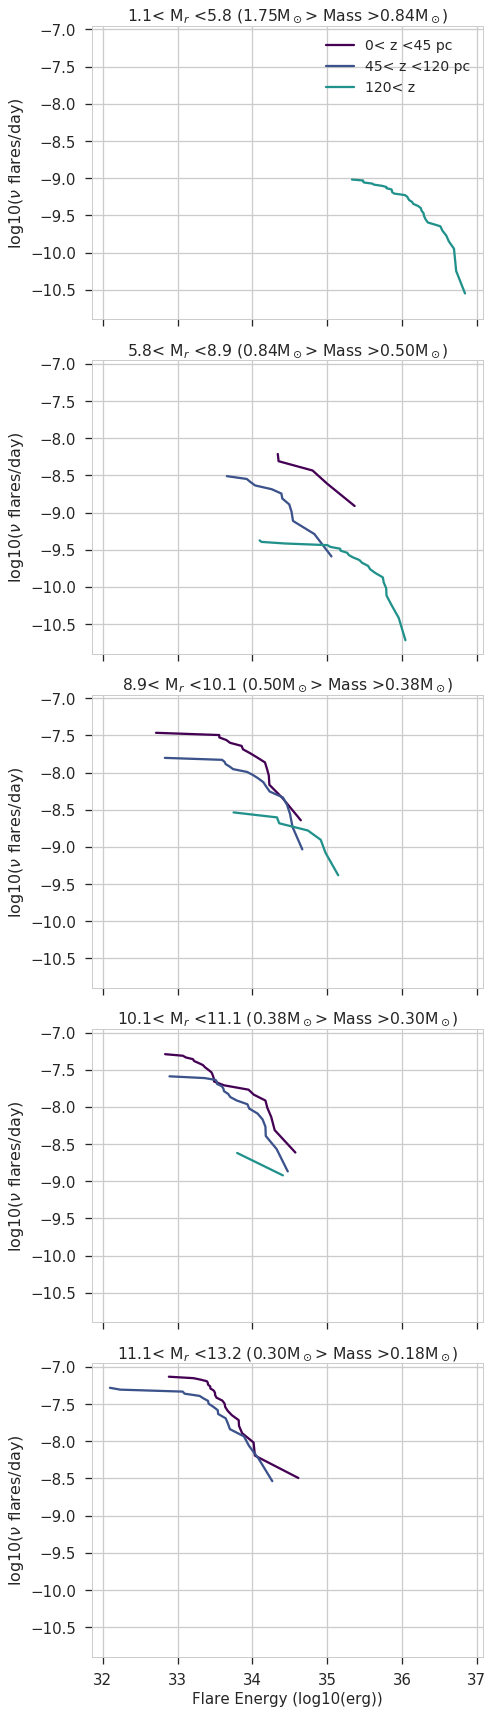

In [722]:
nplot_ffdiagram_binned(flare_energy_limfinal, green_gaia_lim, n_bins=3, bin_column='abs_gal_z',
                       nplots=5, plot_bin_column='Mr_50')

In [796]:
hexbinlim = all_gal.loc[(all_gal['gal_r']/1000 < 11) & (all_gal['gal_r']/1000 > 3.7) &
                        (all_gal['abs_gal_z']/1000 <2)]

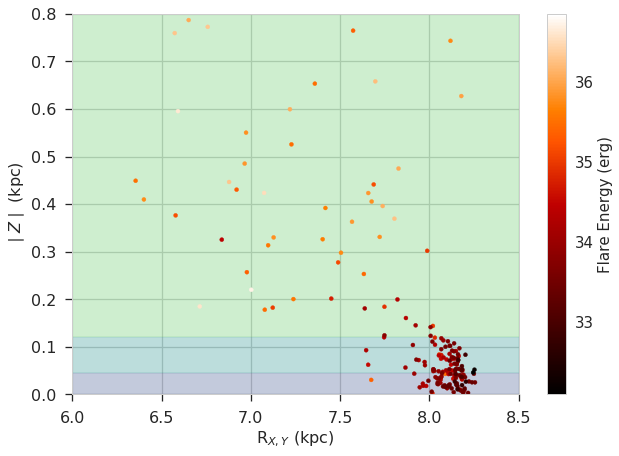

In [690]:
fig = plt.figure(figsize=(10,7))

#plt.hexbin(hexbinlim['gal_r']/1000,hexbinlim['abs_gal_z']/1000, bins='log',cmap='binary')
heightbins_flare = Bins(flare_energy_limfinal, column='abs_gal_z', n_bins=3)/1000
#print(heightbins_flare)


colormap=cm.viridis
normalize = mcolors.Normalize(vmin=0, vmax=4)

plt.fill_between([6,8.5], 0, heightbins_flare[1],color=colormap(normalize(1)), alpha=0.3)
plt.fill_between([6,8.5], heightbins_flare[1], heightbins_flare[2],color=colormap(normalize(2)), alpha=0.3)
plt.fill_between([6,8.5], heightbins_flare[2], .8,color=colormap(normalize(3)), alpha=0.3)

plt.scatter(flare_energy_limfinal['gal_r']/1000,flare_energy_limfinal['abs_gal_z']/1000,
            alpha=1, s=16, c=flare_energy_limfinal['flare_energy'],
            cmap=plt.cm.get_cmap('gist_heat'), label='Flaring Stars') 
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15) 
cb.set_label('Flare Energy (erg)',fontsize=15)
plt.xlabel('R$_{X,Y}$ (kpc)', size=16)
plt.ylabel('$\mid{Z}\mid$ (kpc)', size=16)
plt.xlim(6,8.5)
plt.ylim(0,.8)
plt.tick_params(axis='both', labelsize=16, size=7)


fig.savefig(f'final_plots/final_R_Zplot_flarelim.png', dpi=350, bbox_inches='tight',pad_inches=.25)


/epyc/opt/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/epyc/opt/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 4., 23., 69., 53., 25.,  9., 10., 14.,  3.,  1.]),
 array([32.23188458, 32.81169464, 33.39150471, 33.97131477, 34.55112484,
        35.1309349 , 35.71074497, 36.29055504, 36.8703651 , 37.45017517,
        38.02998523]),
 <a list of 10 Patch objects>)

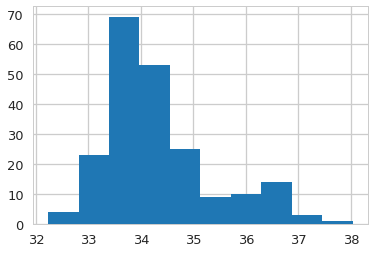

In [853]:
plt.hist(flares_energy_lim['flare_energy'])

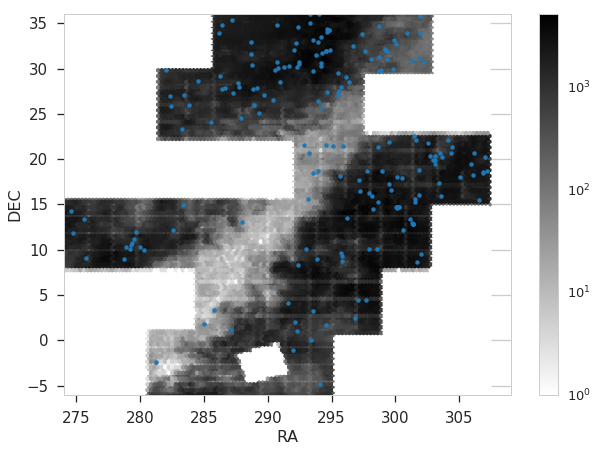

In [714]:
fig = plt.figure(figsize=(10,7))

plt.hexbin(green_gaia_lim['ra'],green_gaia_lim['dec'], bins='log',cmap='binary',gridsize=120)

plt.scatter(flare_energy_limfinal['ra'],flare_energy_limfinal['dec'],
            alpha=1, s=16, c=flare_energy_limfinal['flare_energy'],
            cmap=plt.cm.get_cmap('gist_heat'), label='Flaring Stars') 

cb = plt.colorbar()
cb.ax.tick_params(labelsize=15) 
cb.set_label('Flare Energy (erg)',fontsize=15)
plt.xlabel('RA',size=16)
plt.ylabel('DEC',size=16)
#plt.xlim(3.7,11)
plt.ylim(-6,36)
plt.tick_params(axis='both', labelsize=15, size=7)


 
#fig.savefig(f'final_plots/final_Ra_Decplot_flarelim.png', dpi=350, bbox_inches='tight',pad_inches=.25)

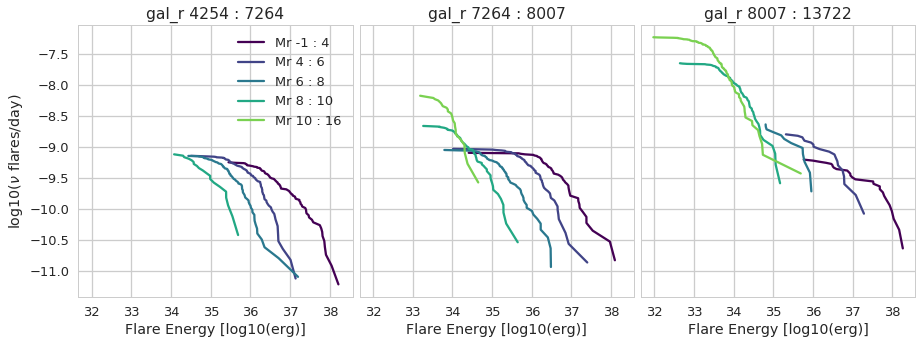

In [474]:
nplot_ffdiagram_binned(galcoordflare, all_gal, nplots=3, plot_bin_column='gal_r')

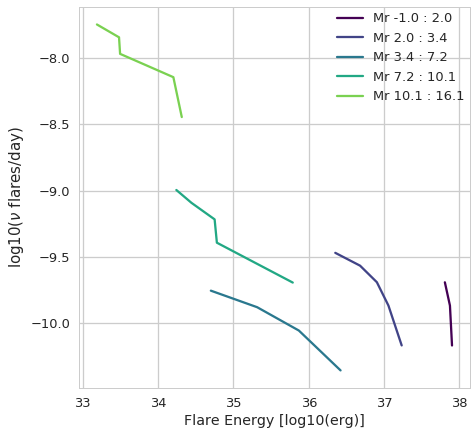

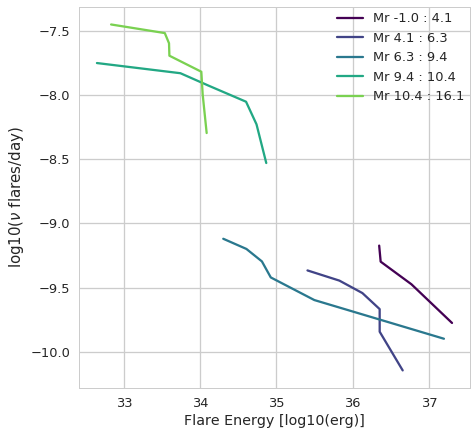

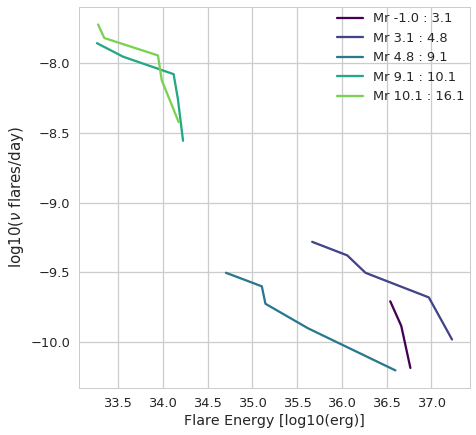

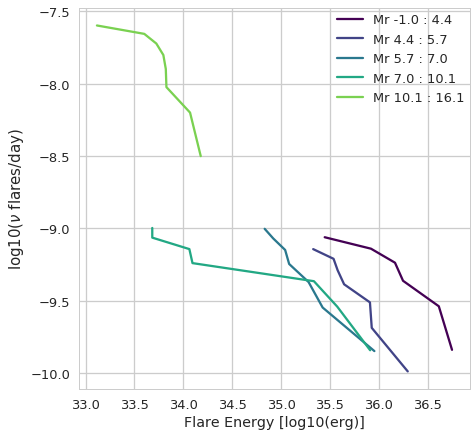

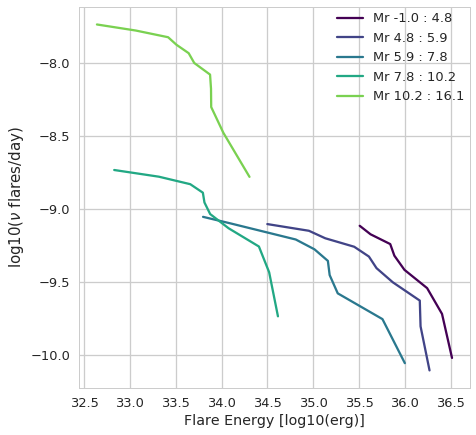

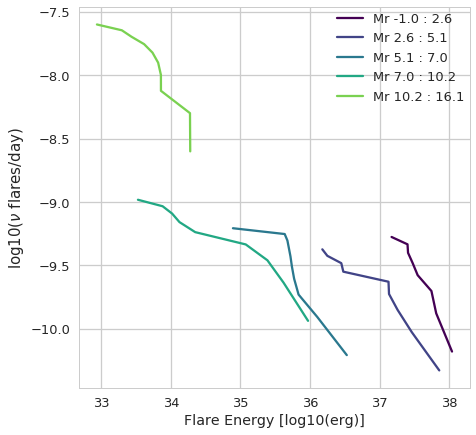

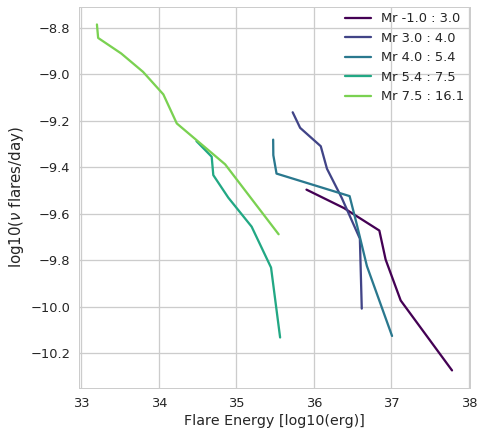

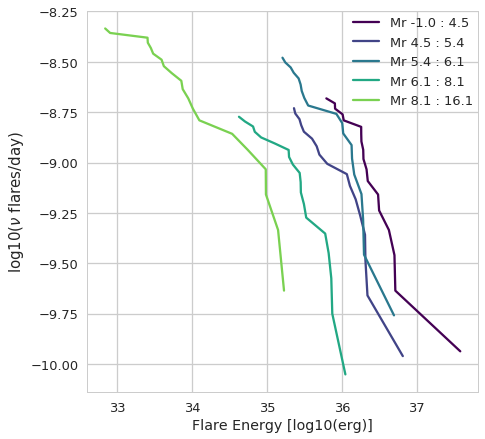

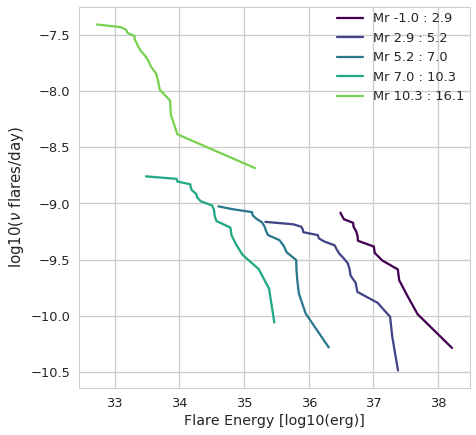

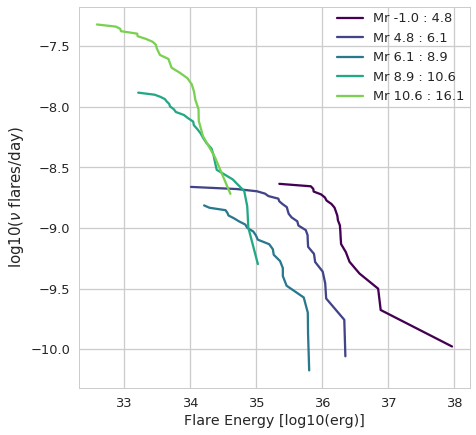

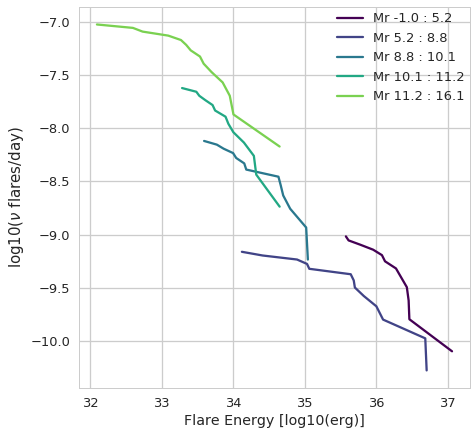

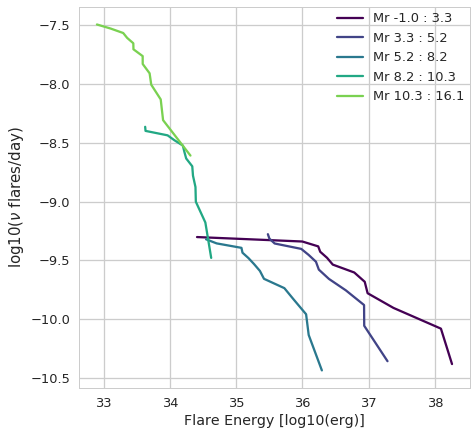

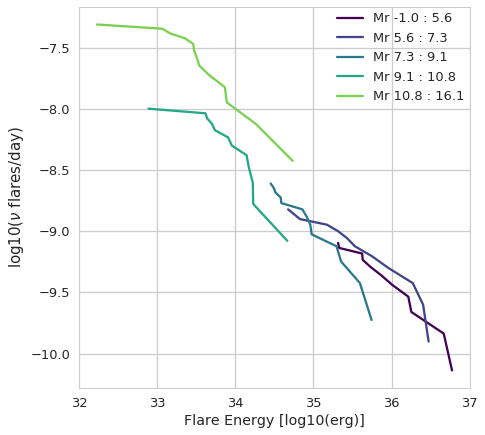

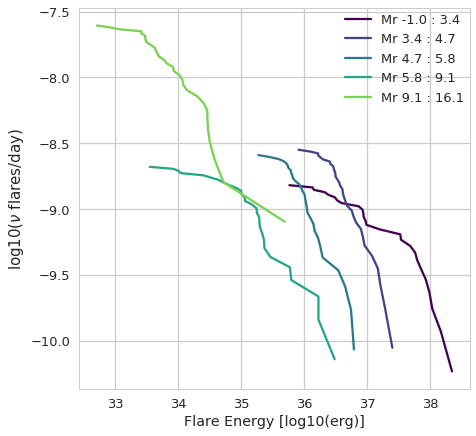

In [326]:
ffdiagram_binned(f436,fall436)
ffdiagram_binned(f437,fall437)
ffdiagram_binned(f488,fall488)
ffdiagram_binned(f489,fall489)
ffdiagram_binned(f538,fall538)
ffdiagram_binned(f539,fall539)
ffdiagram_binned(f540,fall540)
ffdiagram_binned(f541,fall541)
ffdiagram_binned(f591,fall591)
ffdiagram_binned(f592,fall592)
ffdiagram_binned(f638,fall638)
ffdiagram_binned(f639,fall639)
ffdiagram_binned(f685,fall685)
ffdiagram_binned(f686,fall686)

(array([26252266., 21063497., 22883886., 20471948.,  2674924.]),
 array([-0.9  ,  3.85 ,  5.3  ,  6.925,  9.6  , 15.9  ], dtype=float32),
 <a list of 5 Patch objects>)

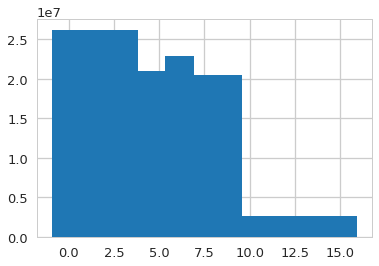

In [86]:
plt.hist(green_ids['Mr_50'],  bins=bins_Mr)


In [340]:
all_gal = galactic_centric_coords(green_gaia)

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    [(-2771.62848324, 3252.66054065, 142.54741016),
     (-6300.66576286, 1176.1182818 ,  68.67790588),
     (-3520.76523737, 2812.77760229, 127.16724096), ...,
     (-6138.57597258, 6807.51186443,  89.02590247),
     (-7343.86875457, 3011.63180309,  54.4715658 ),
     (-7526.14672991, 2437.48056677,  49.19882298)]>


TypeError: text() missing 1 required positional argument: 's'

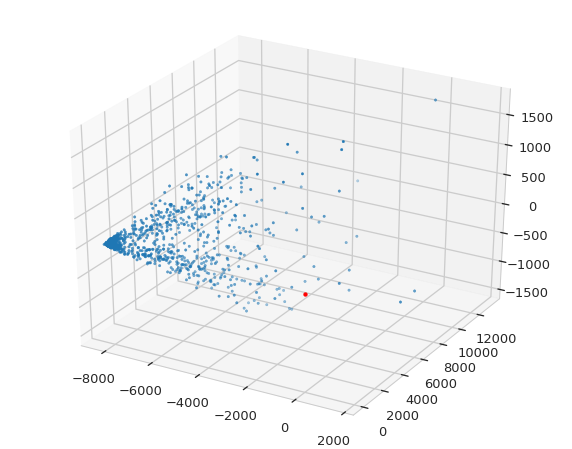

In [212]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')


ax.scatter(galcoordflare['gal_x'], galcoordflare['gal_y'], galcoordflare['gal_z'], s=6)
ax.scatter(0,0,0, s=15, c='red', label='Galactic Center')
ax.text(0, 0, 0 'Galactic Center')

ax.set_xlabel('X PC')
ax.set_ylabel('Y PC')
ax.set_zlabel('Z PC')

plt.show()

In [336]:
zbins = Bins(galcoordflare,column='abs_gal_z',n_bins=3)
zbins

array([3.59741242e-02, 7.36080531e+01, 3.00772050e+02, 1.69604975e+03])

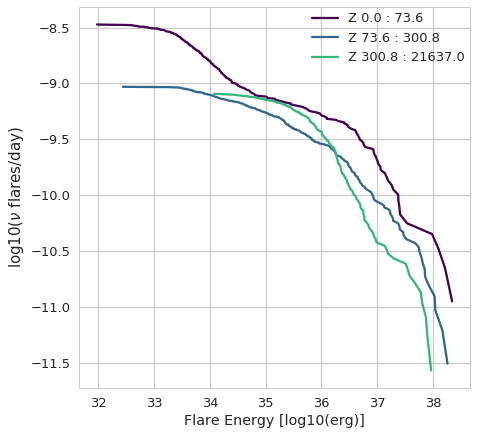

In [337]:
ffdiagram_binned(galcoordflare, all_gal, n_bins=3, bin_column='abs_gal_z', legendlabel='Z')

In [343]:

height1_flare = galcoordflare.loc[(galcoordflare['abs_gal_z'].values > zbins[0]) & (galcoordflare['abs_gal_z'].values < zbins[1])]
height2_flare = galcoordflare.loc[(galcoordflare['abs_gal_z'].values > zbins[1]) & (galcoordflare['abs_gal_z'].values < zbins[2])]
height3_flare = galcoordflare.loc[(galcoordflare['abs_gal_z'].values > zbins[2]) & (galcoordflare['abs_gal_z'].values < zbins[3])]

height1_all = all_gal.loc[(all_gal['abs_gal_z'].values < zbins[1])]
height2_all = all_gal.loc[(all_gal['abs_gal_z'].values > zbins[1]) & (all_gal['abs_gal_z'].values < zbins[2])]
height3_all = all_gal.loc[(all_gal['abs_gal_z'].values > zbins[2])]


In [354]:
mr_galbins= Bins(galcoordflare)

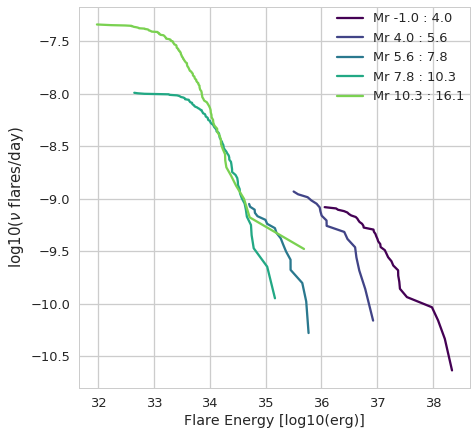

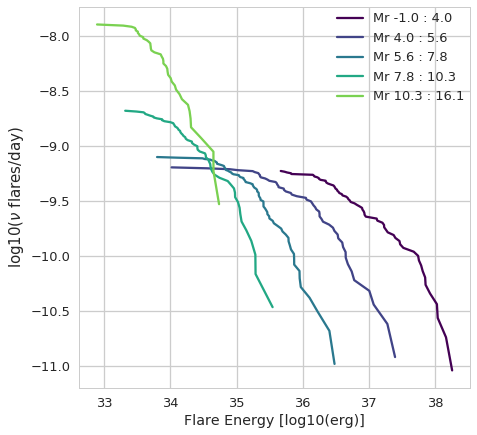

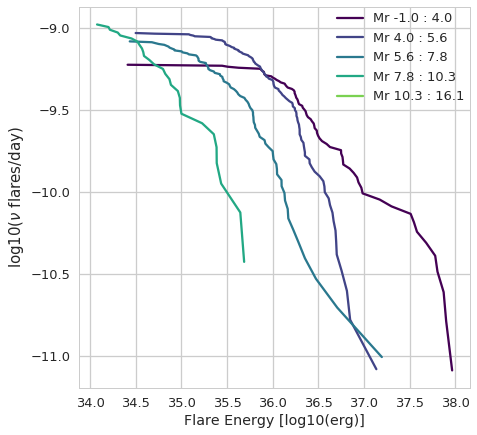

In [361]:
ffdiagram_binned(height1_flare, height1_all, bins=mr_galbins)
ffdiagram_binned(height2_flare, height2_all, bins=mr_galbins)
ffdiagram_binned(height3_flare, height3_all, bins=mr_galbins)

## Plot Flare for Poster 

In [498]:
def veiwlimitedcurves(flare_energy):
    #dflim = flare_energy.loc[(flare_energy['ztf_n_obs']< 10)]

    #dflim = flare_energy.loc[((flare_energy['red_gauss'] - flare_energy['red_flare']) / flare_energy['red_flare'] > 1.5)&
    #                          (flare_energy['dof_flare']>15)]
                              #(flare_energy['Mr_50']<10)]
    
    dflim = flare_energy.loc[(flare_energy['equivdur']> 1000) 
                             &(flare_energy['flare_end_diff']>0.05) 
                             &(flare_energy['E_50']>0) 
                             &(flare_energy['A_bp']<1) 
                             &(flare_energy['A_rp']<1) 
                             &(flare_energy['dof_flare']>15) 
                             &((flare_energy['red_gauss'] - flare_energy['red_flare']) / flare_energy['red_flare'] > .5) 
                             #&(flare_energy['phot_g_mean_mag']>20)
                             ]                         

    
    print(len(flare_energy)-len(dflim),len(dflim))
    
    for i in range(len(dflim)):
        folder = 'found_flares_' + dflim['match_file'].values[i].split('_')[1][3:] + '/'
        filepath = folder + dflim['match_file'].values[i] + '_id_' + str(dflim['id'].values[i]) + '*'
        filepath = glob.glob(filepath)

        for j in filepath:
            display(Image(filename=j)) 
            
            

12764 48


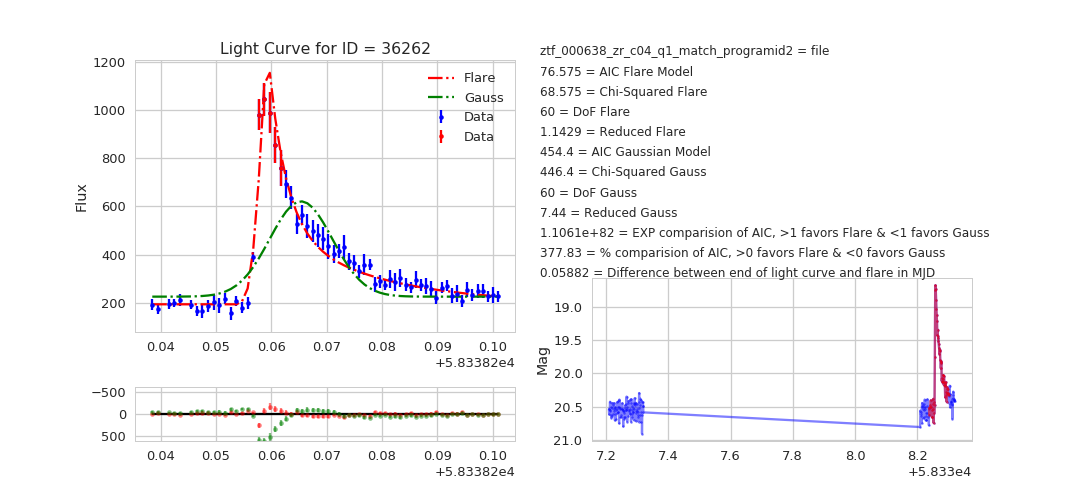

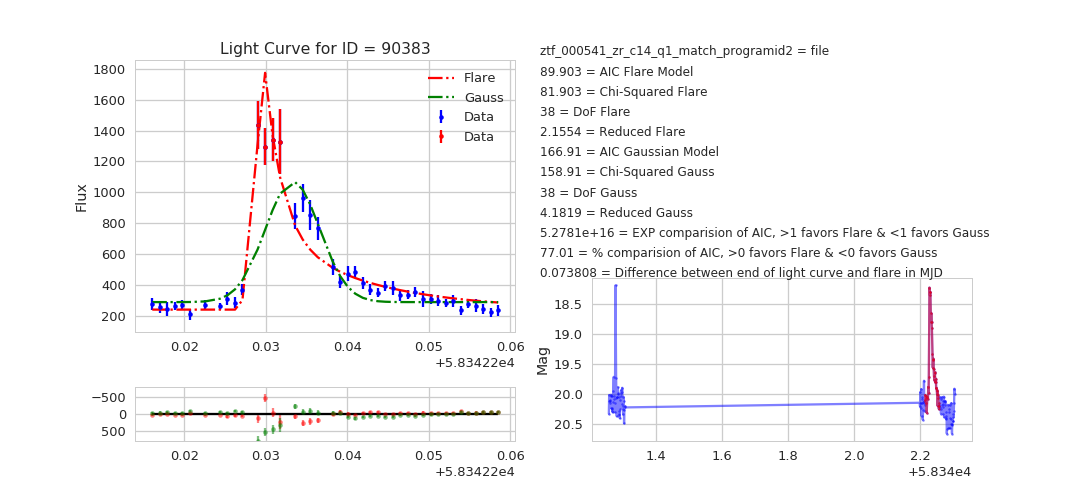

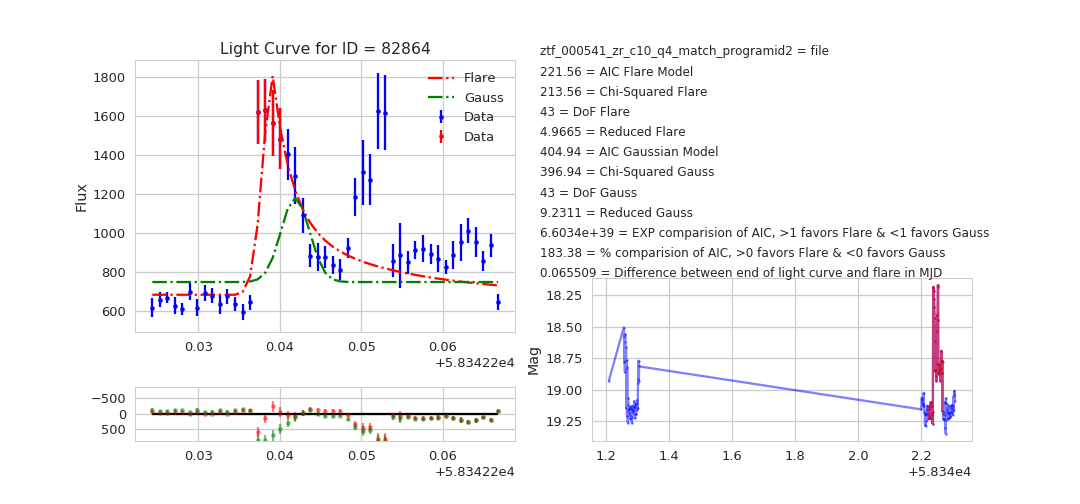

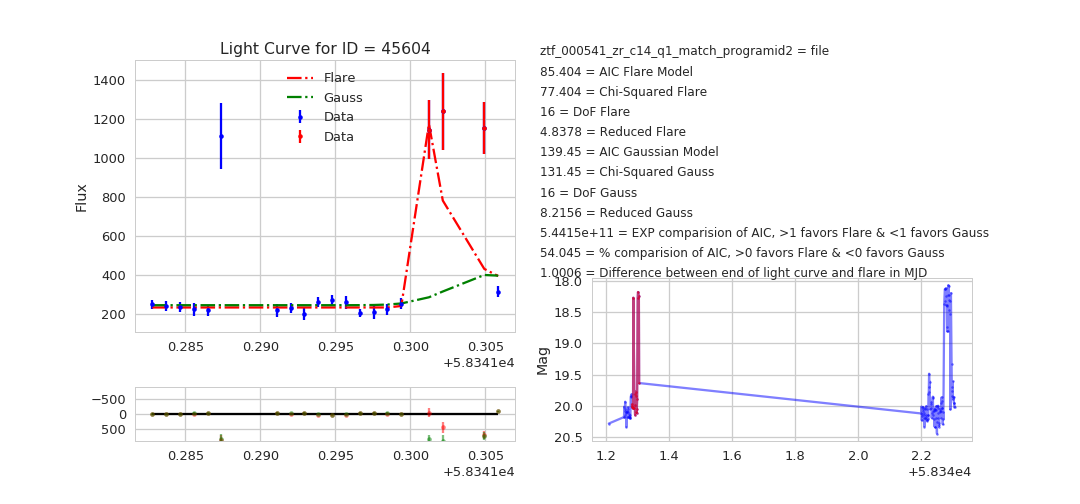

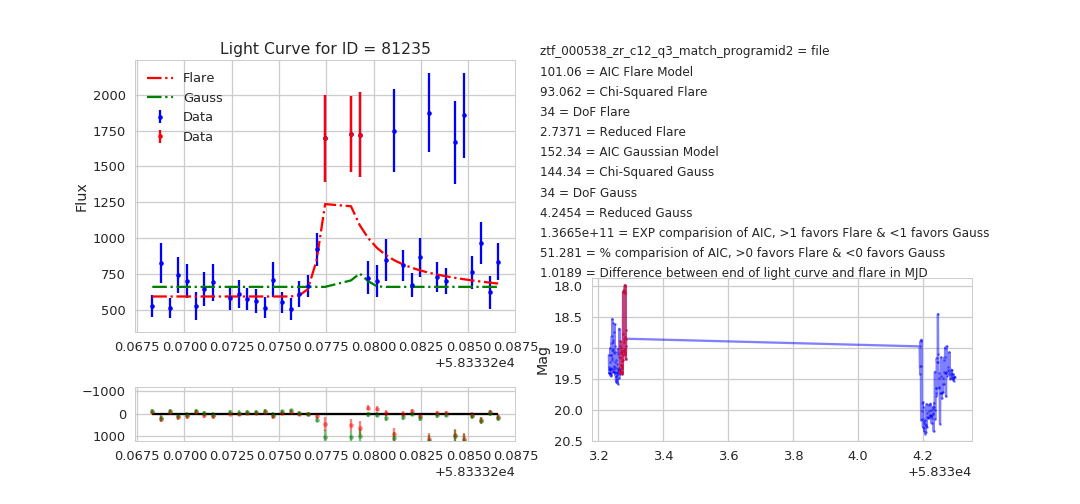

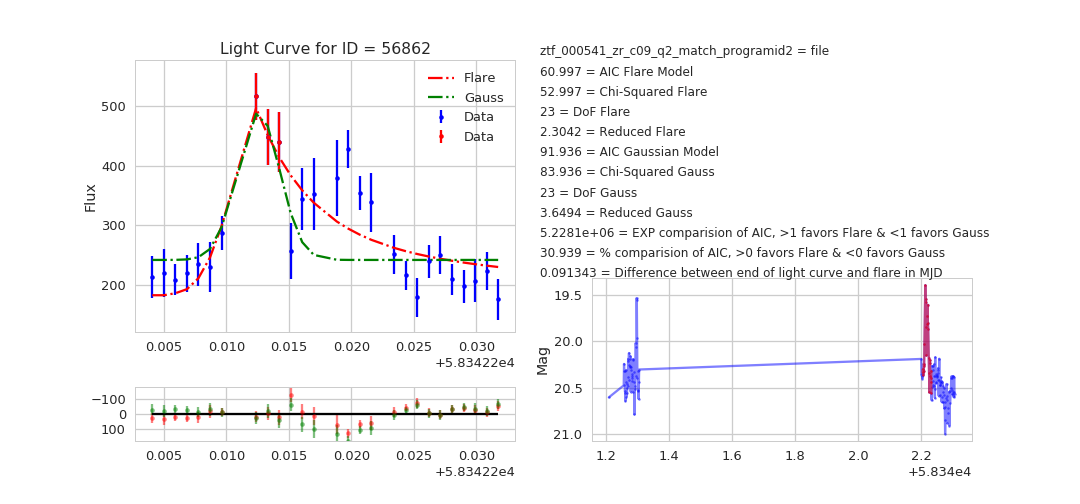

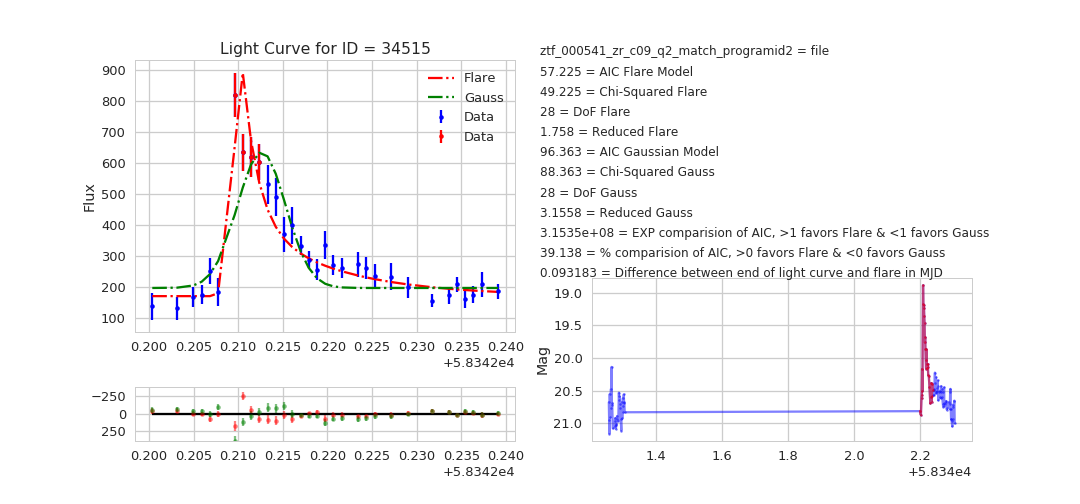

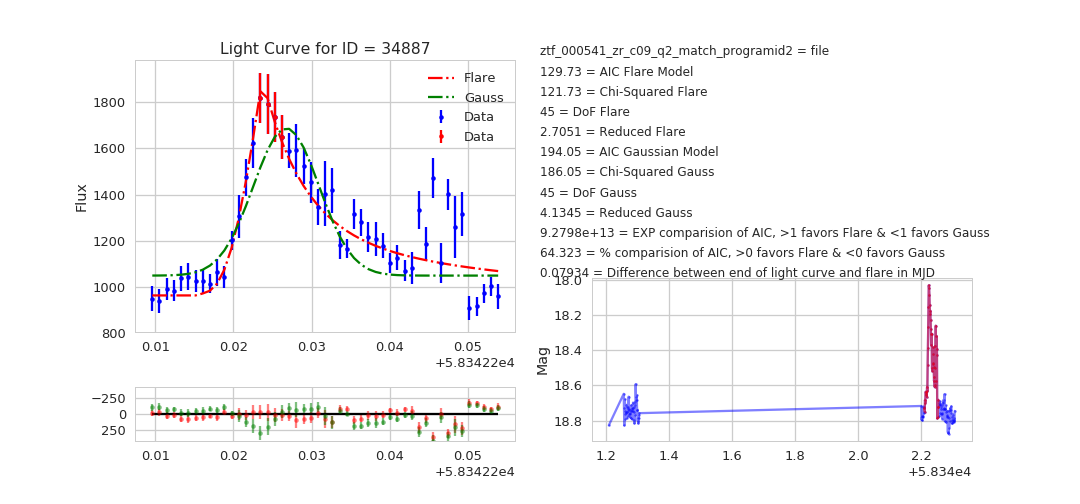

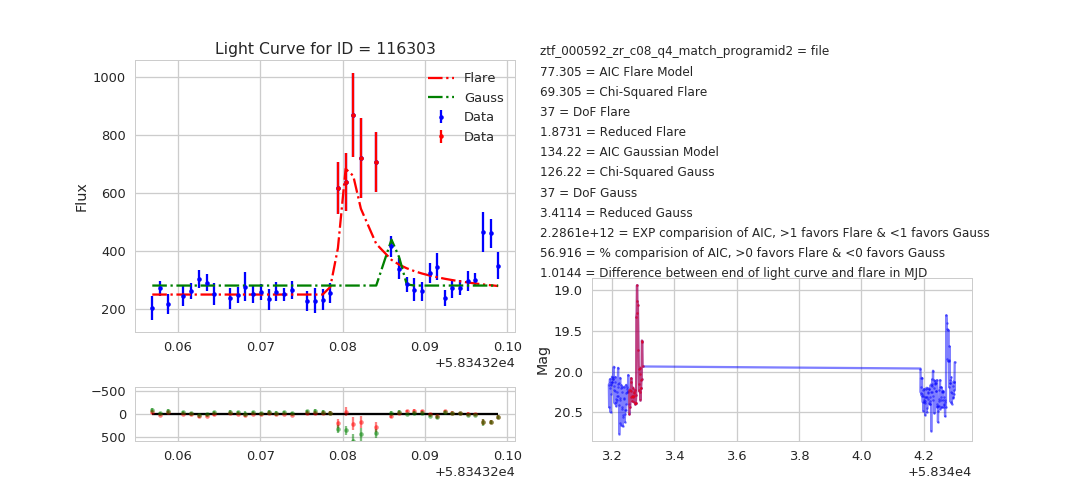

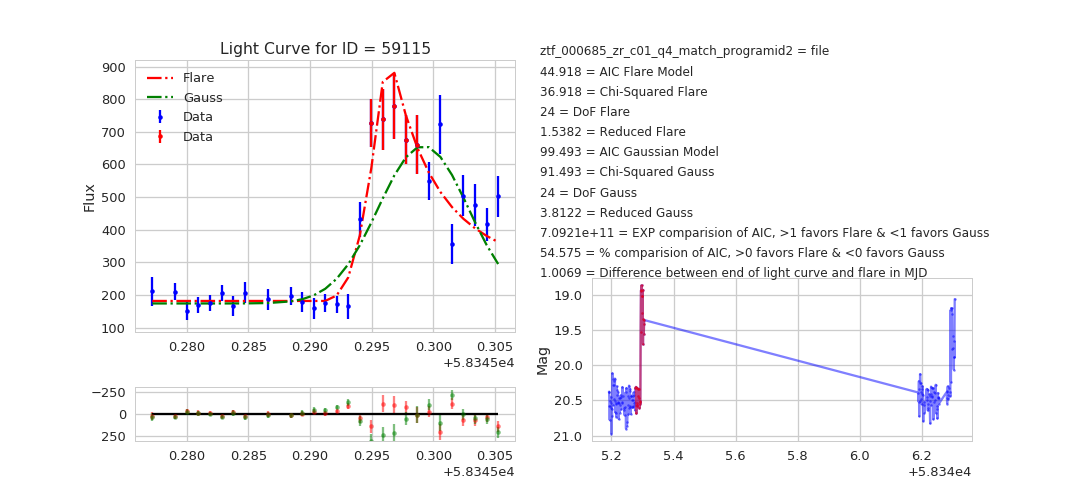

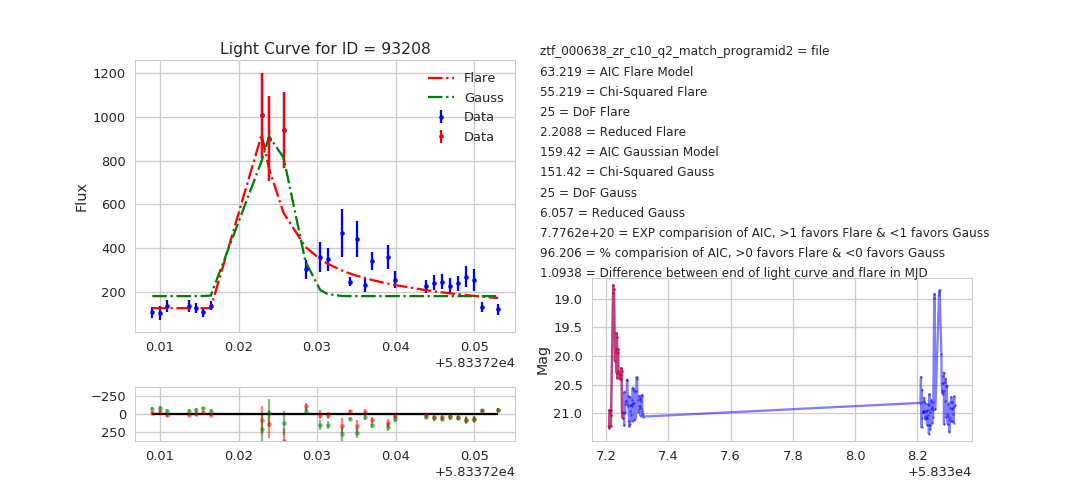

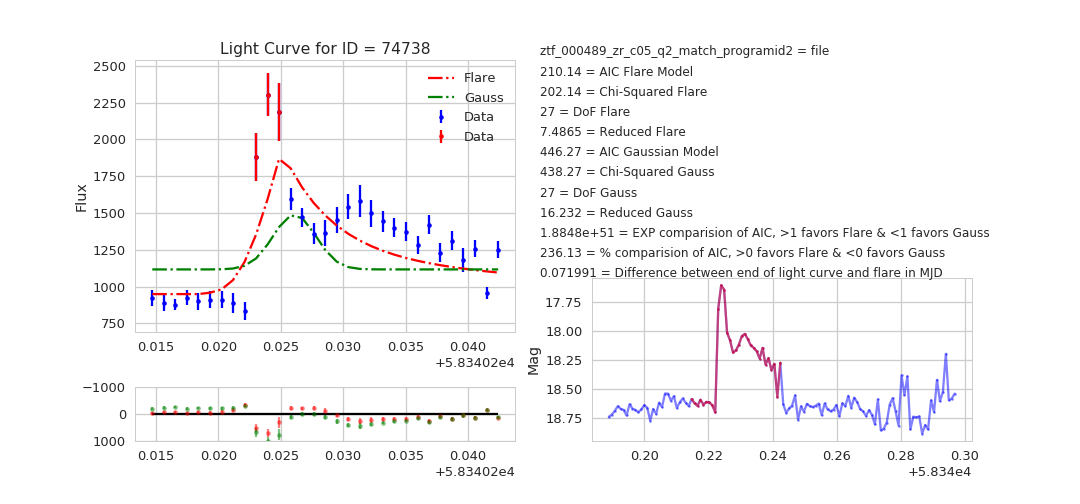

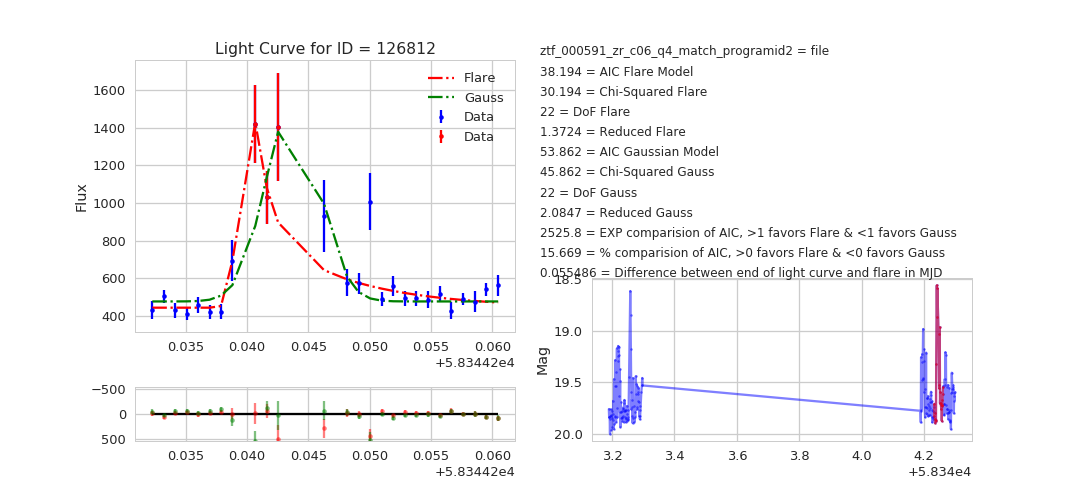

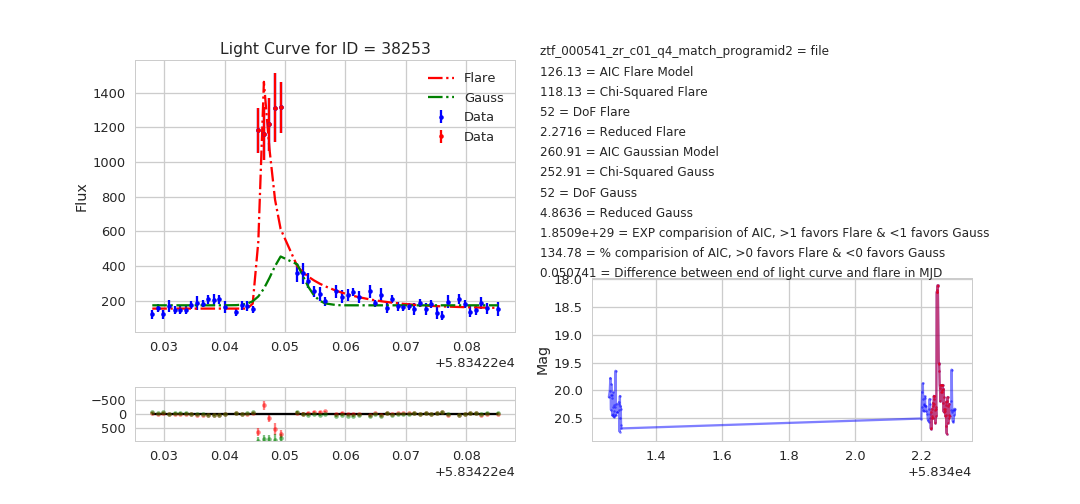

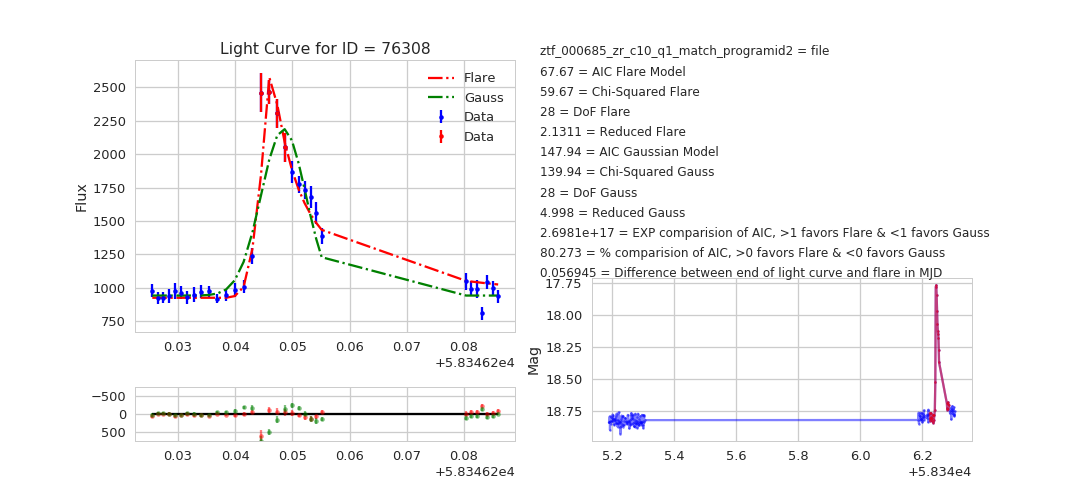

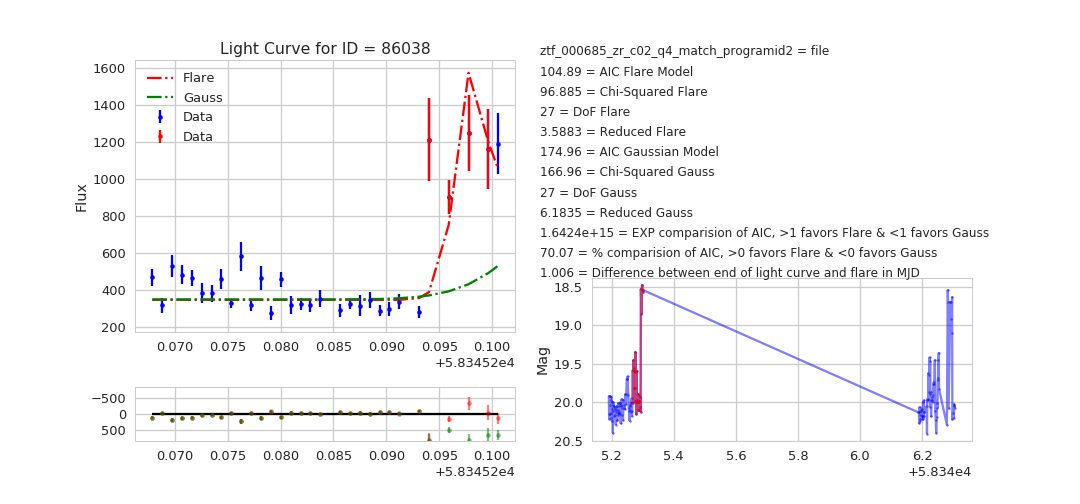

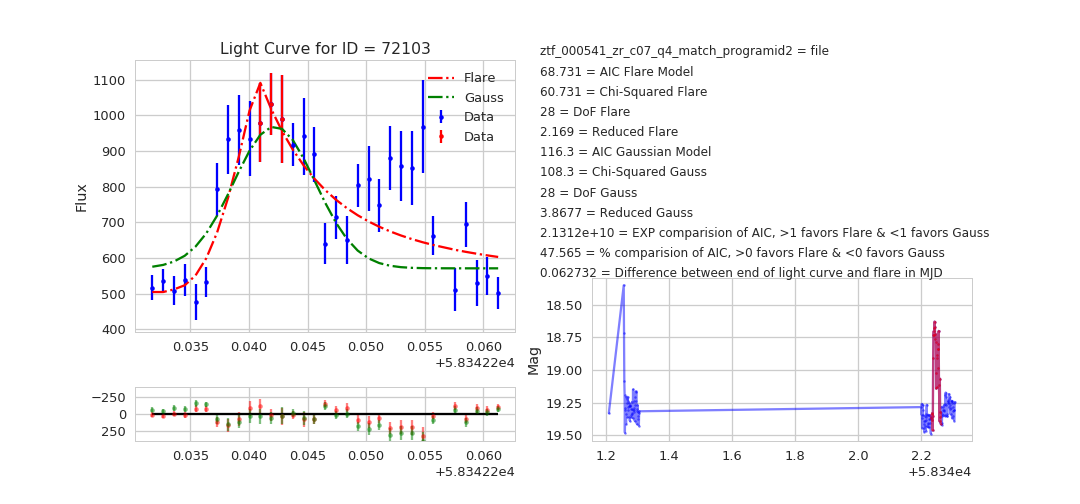

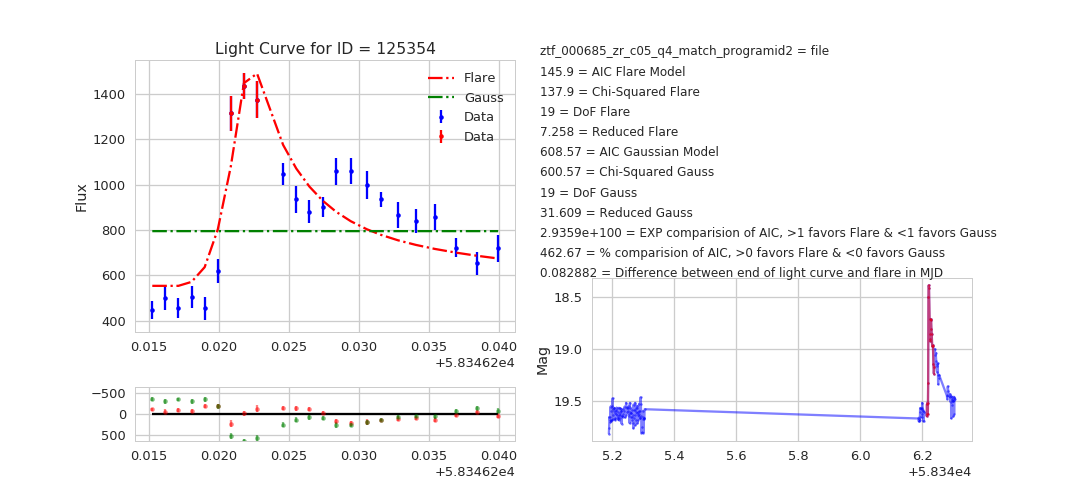

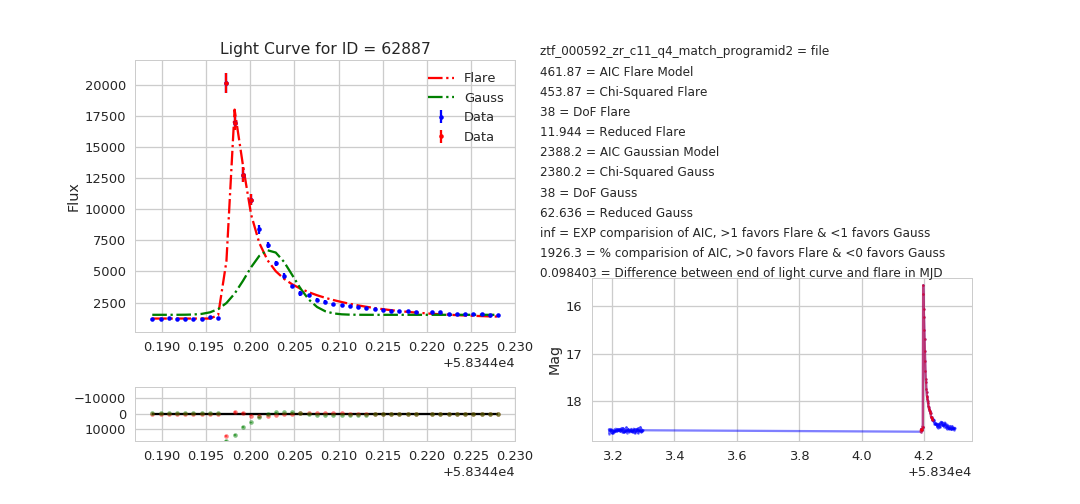

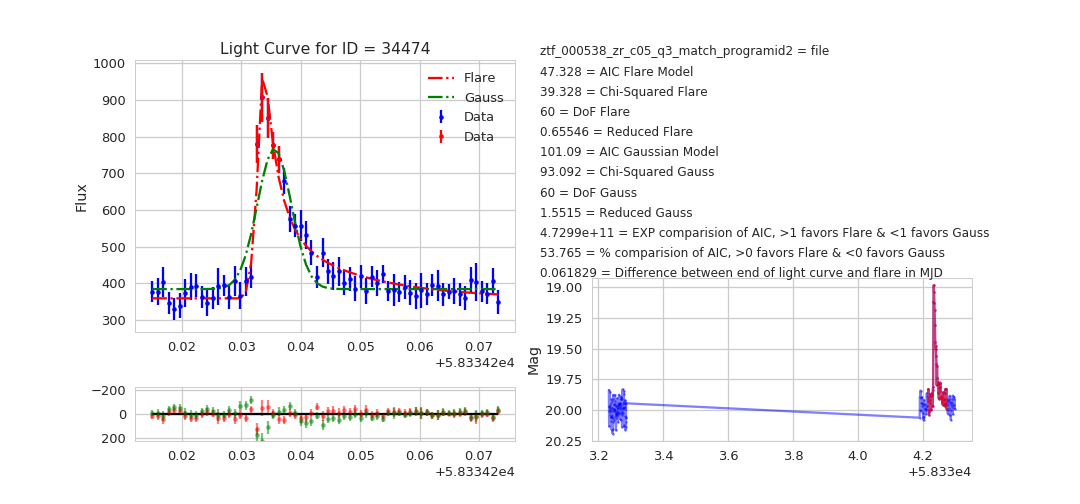

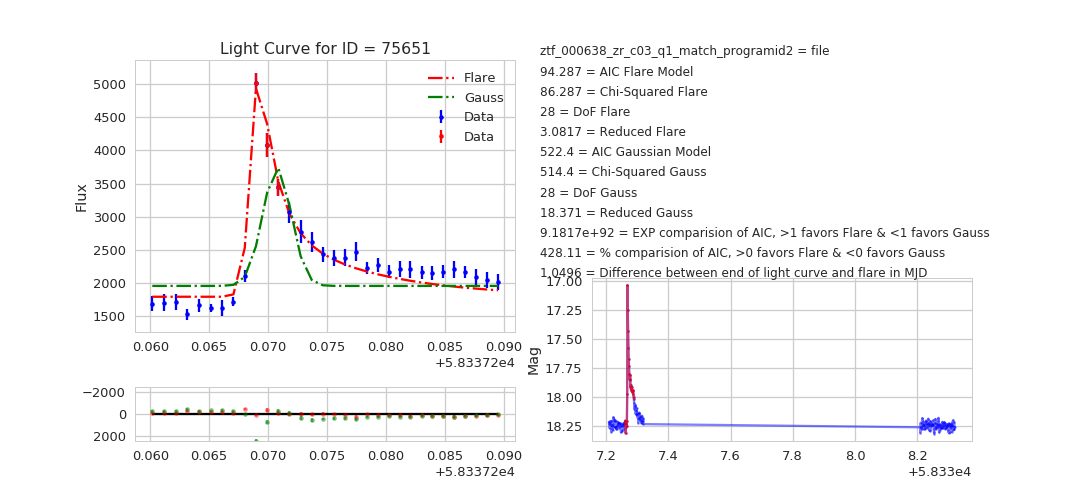

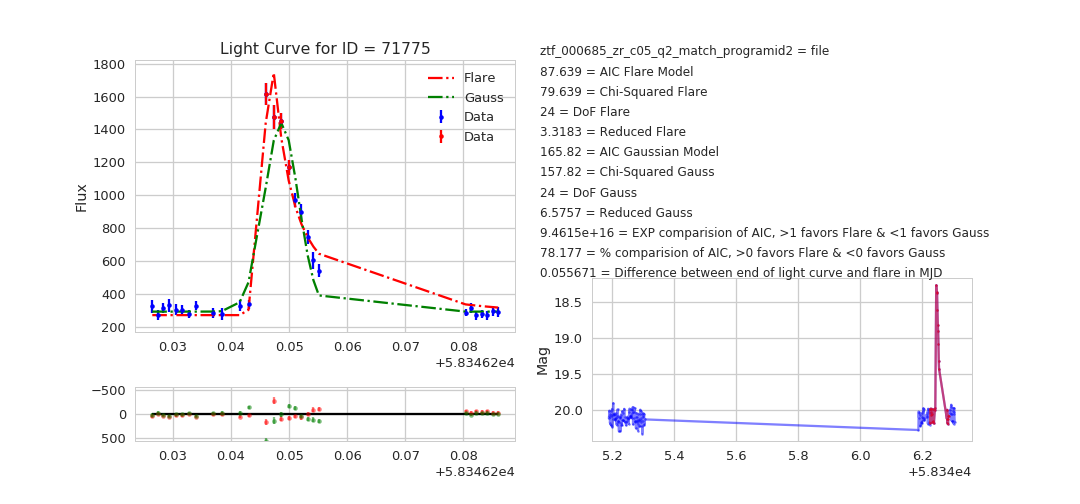

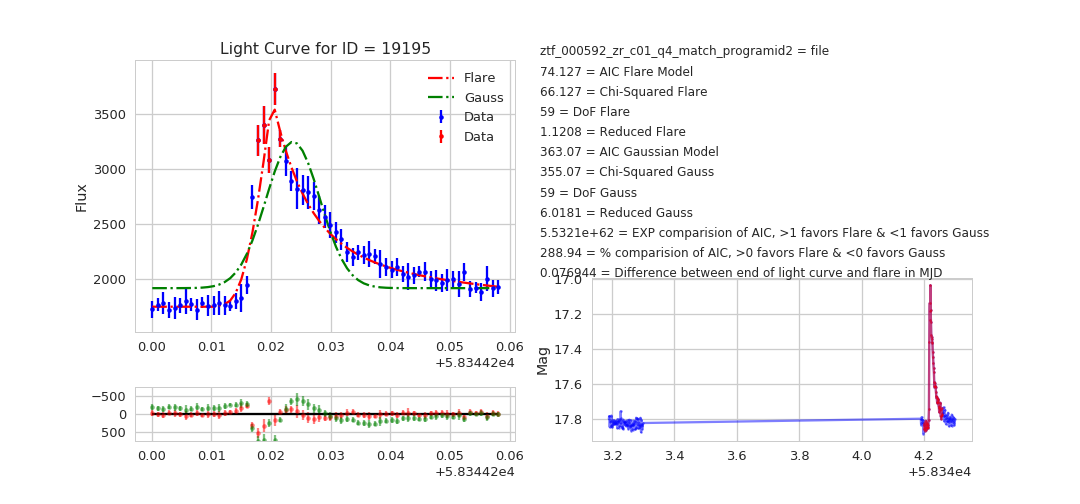

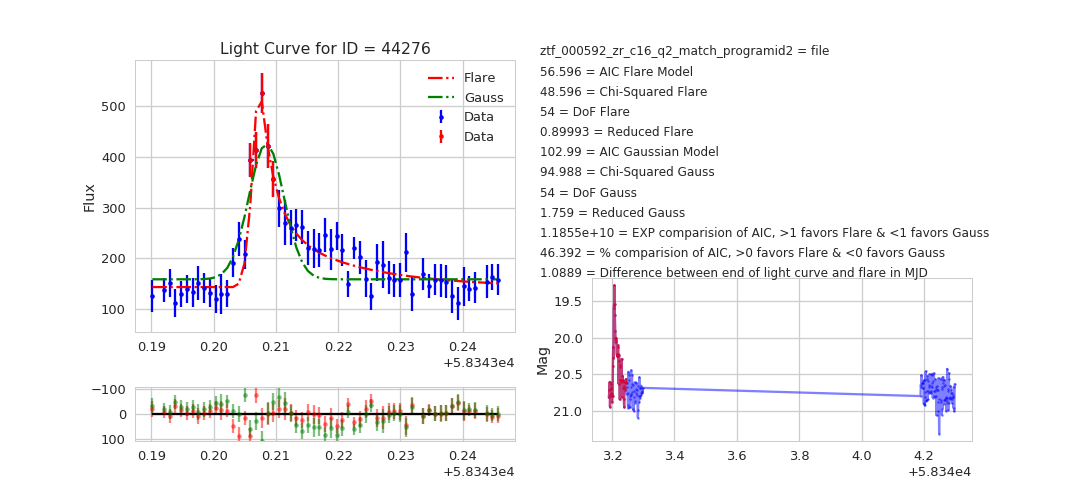

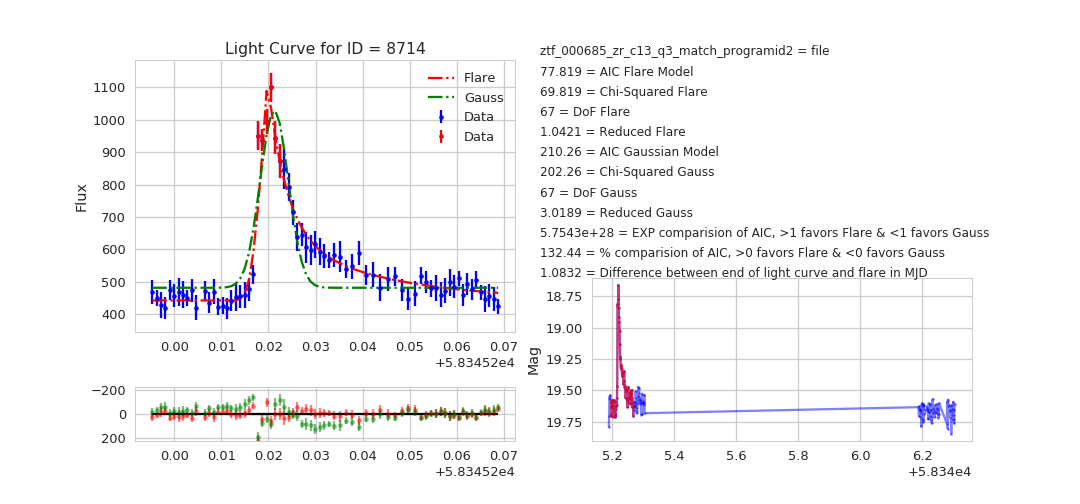

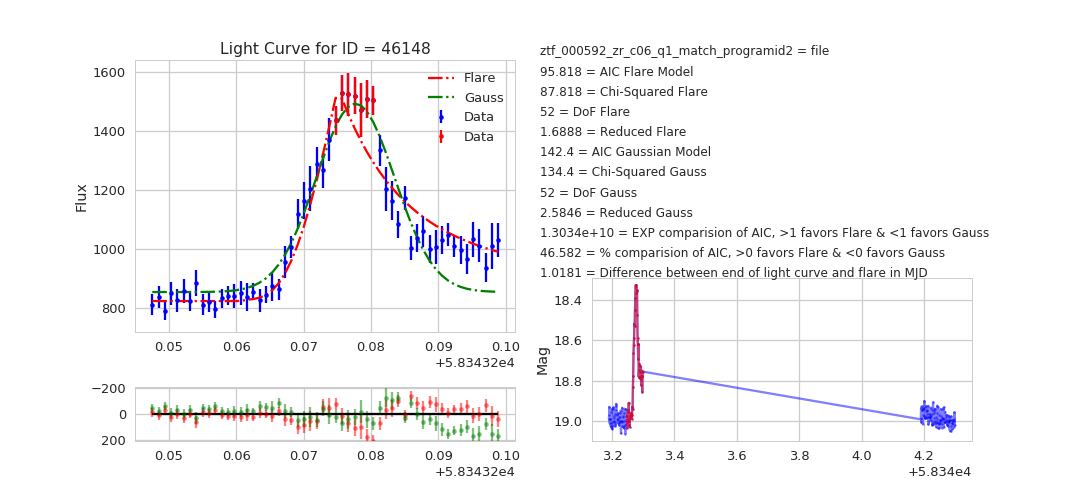

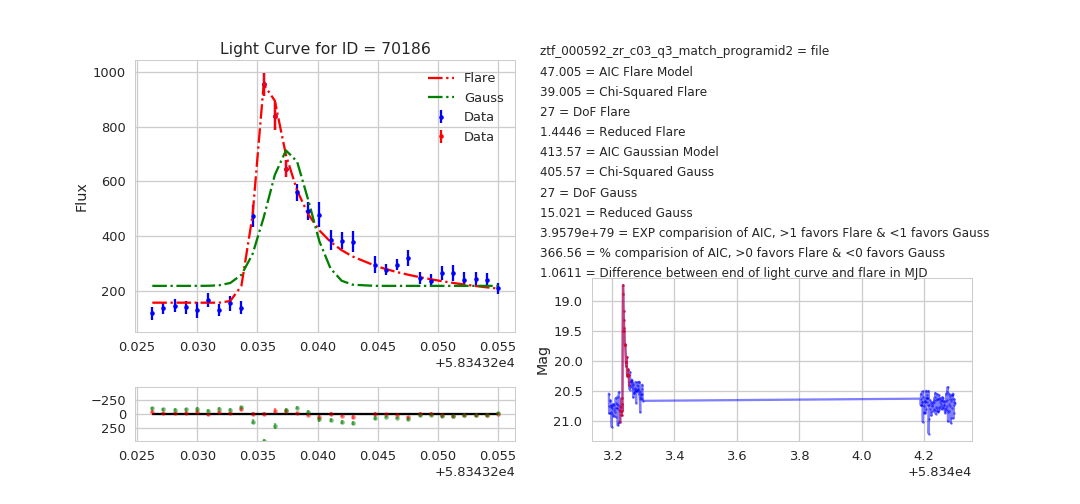

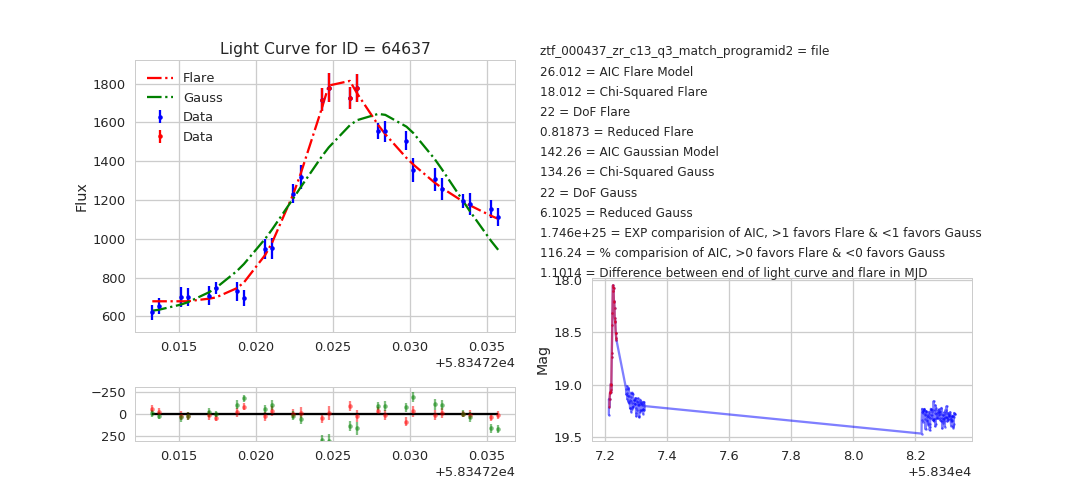

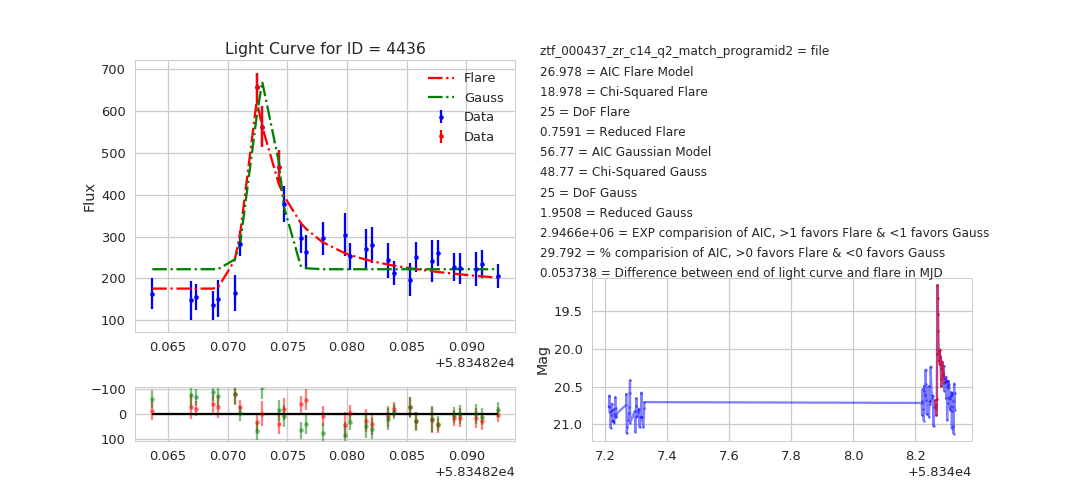

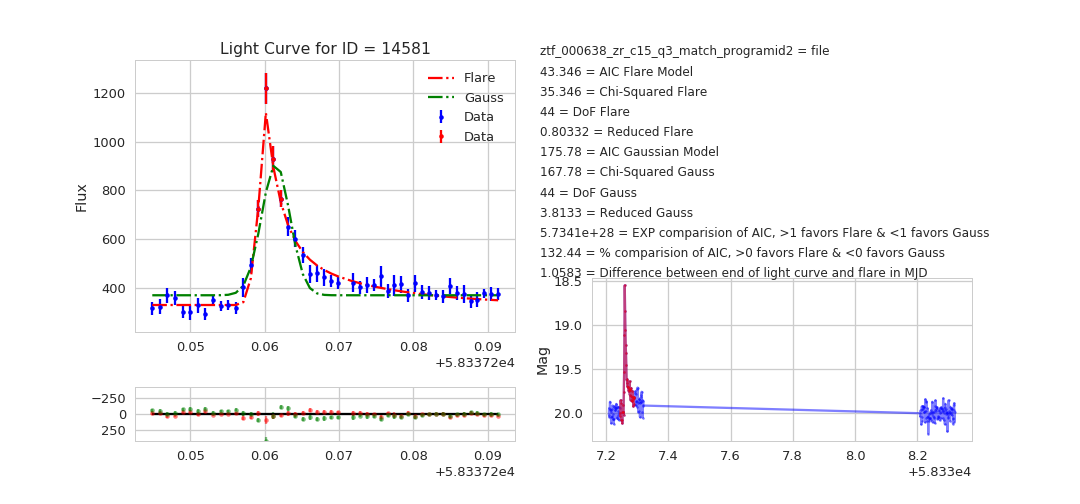

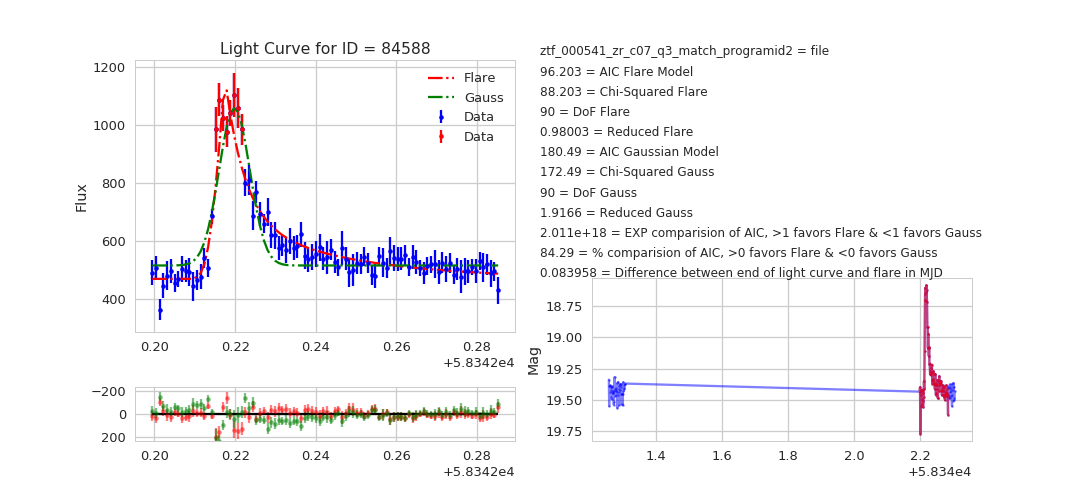

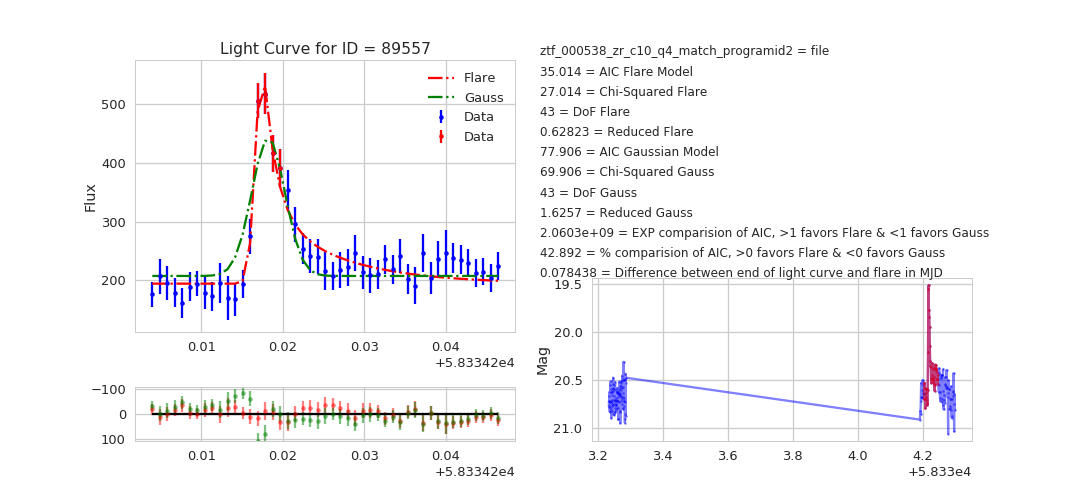

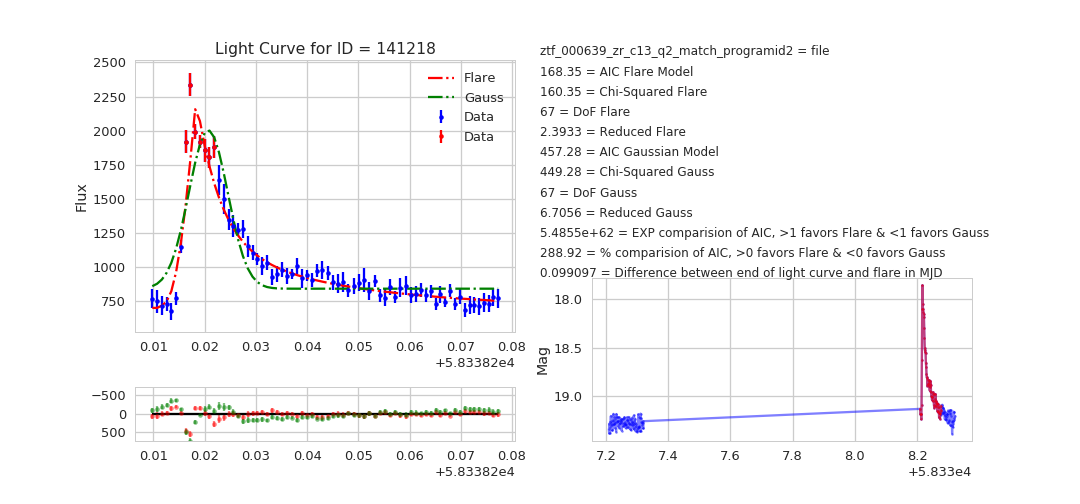

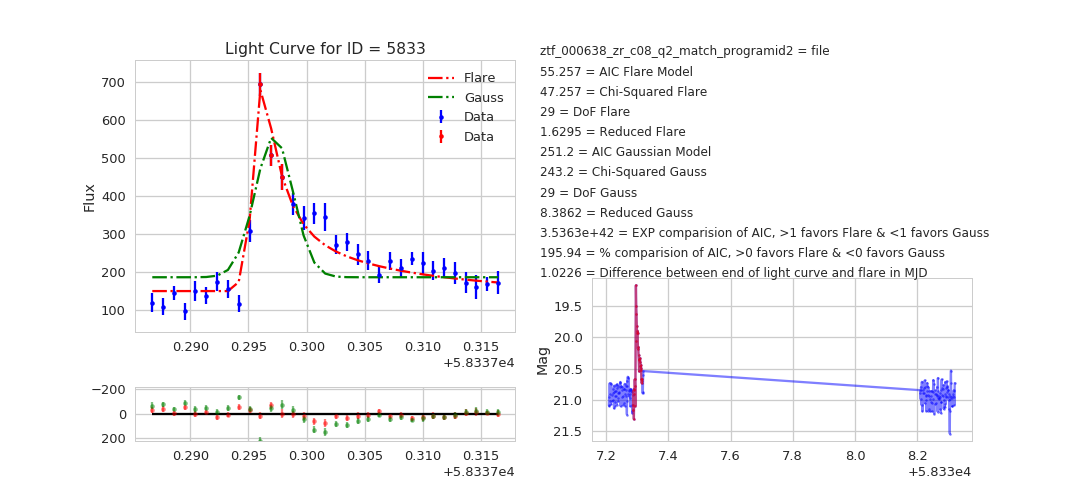

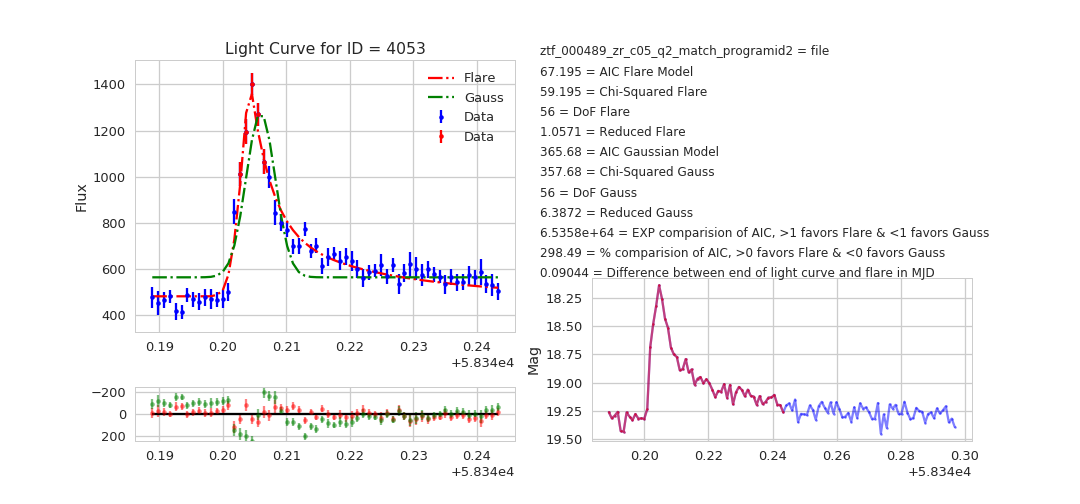

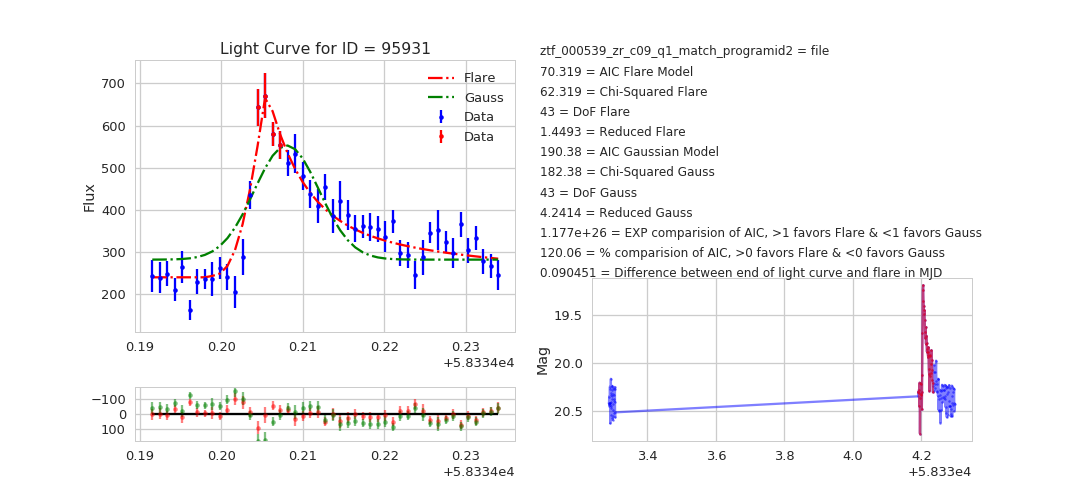

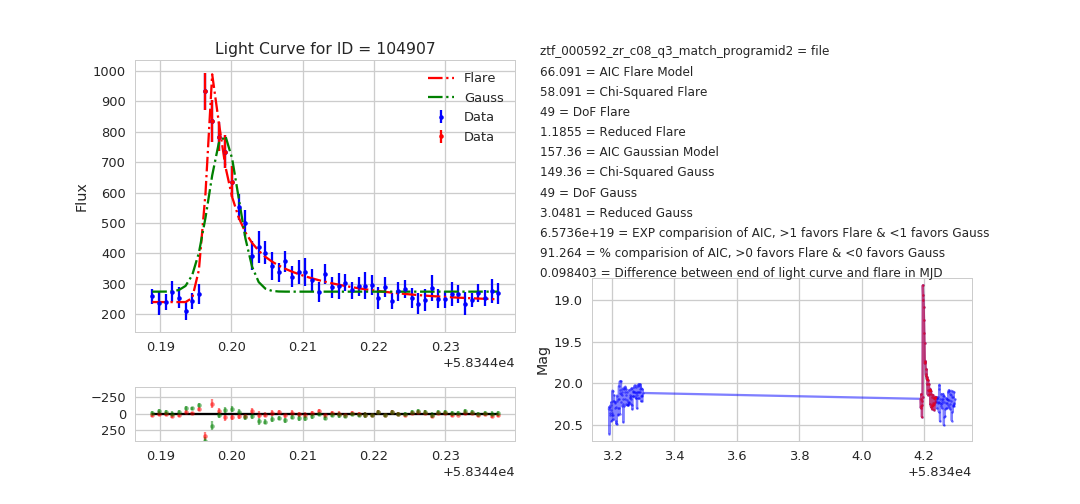

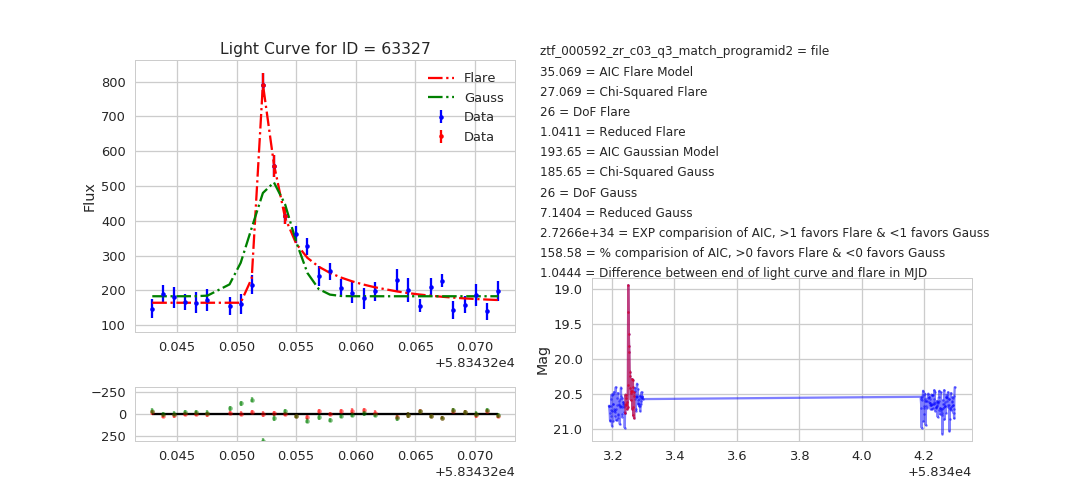

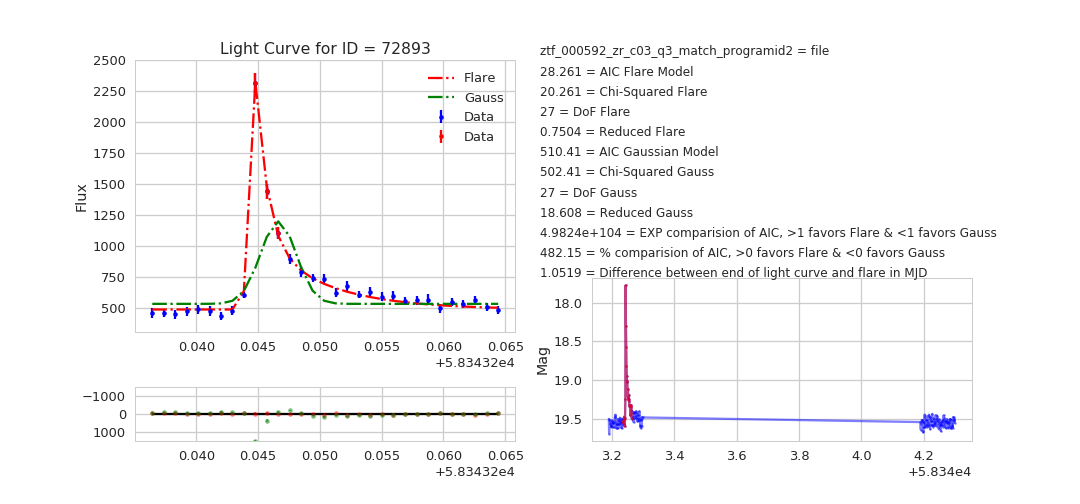

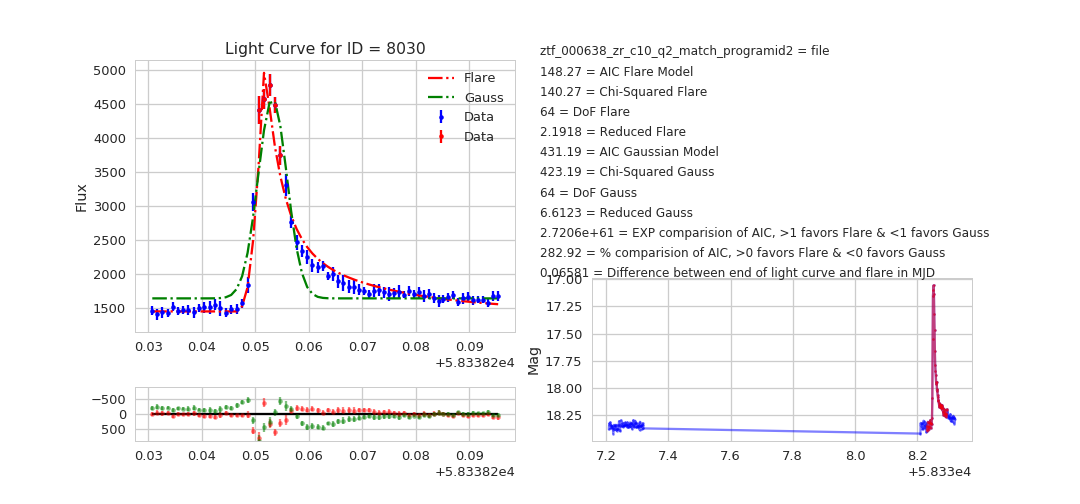

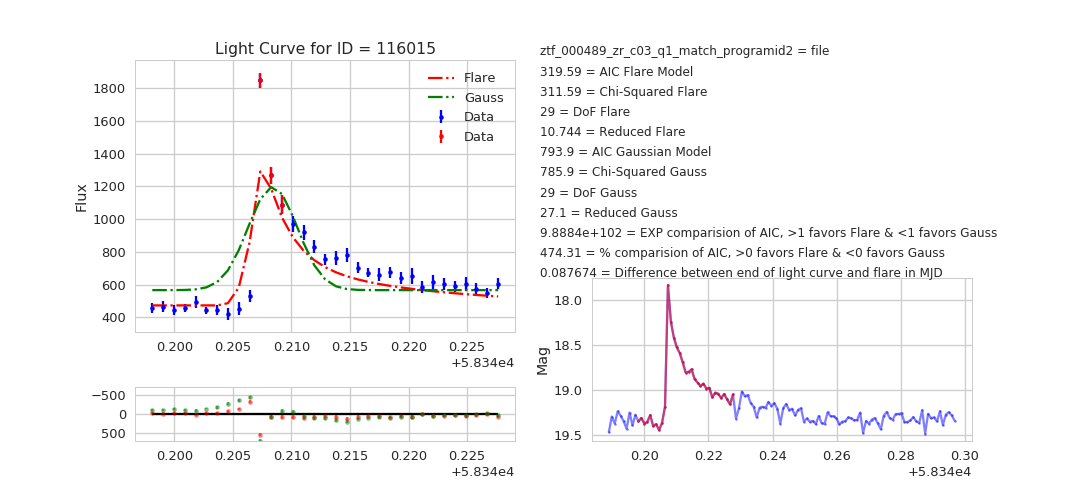

In [499]:
veiwlimitedcurves(flare_energy) 

In [373]:
12238 - 9274

2964

In [236]:
#ids used: 36262, 12173, 4720
#idflare =2286, 54288, 12173, 38211
idflare = 11026

In [237]:
flare_energy.head()

matchid          ra        dec  ztf_n_obs  \
318   10436521059065  285.347644   0.871223        419   
339   10436122003144  281.913685  -4.657667        104   
52    10436361107415  285.543569  -1.479326        178   
54    10436361131401  285.550429  -1.468019        324   
5682  10591562010632  295.568108  22.425084        425   

      exploded_unique_matchids_index  unique_matchids_exploded  \
318                                2            10488152030349   
339                                0            10436122003144   
52                                 0            10436362042093   
54                                 1            10436362128206   
5682                               0            10639022063064   

                                match_file      id    aic_flare    chi_flare  \
318   ztf_000488_zr_c04_q4_match_programid   30349   108.799890   100.799890   
339   ztf_000436_zr_c04_q1_match_programid    3144  1167.996764  1159.996785   
52    ztf_000436_zr_c10_q1_match_programid   42093  8683.010411  8675.010337   
54    ztf_000436_zr_c10_q1_match_programid  128206  4033.274745  4025.274760   
5682  ztf_000639_zr_c01_q3_match_programid   63064   317.403101   309.403104   

      dof_flare   red_flare   aic_gauss   chi_gauss  dof_gauss  red_gauss  \
318          69    1.460868   74.076557   66.076557         69   0.957631   
339          16   72.499799  119.897410  111.897411         16   6.993588   
52           13  667.308487  186.698169  178.698169         13  13.746013   
54           11  365.934069  322.114354  314.114353         11  28.555850   
5682         49    6.314349  303.477976  295.477979         49   6.030163   

           exp_comp    perc_comp                    fl_indx       equivdur  \
318    2.883526e-08   -34.723334     [14 15 16 17 18 19 20]   16564.295128   
339   2.559275e-228 -1048.099354                [1 2 3 4 5]   18618.947202   
52     0.000000e+00 -8496.312242  [124 125 126 127 128 129]  582818.995841   
54     0.000000e+00 -3711.160391                 [97 98 99]   77614.526639   
5682   9.466678e-04   -13.925125              [28 29 30 31]   10373.091358   

          xpos      ypos    flare_time      end_time  flare_end_diff  \
318   2979.880  3040.250  58340.219803  58340.296401        0.068287   
339   1905.064   230.482  58347.214641  58347.326678        0.108368   
52    2238.372  2257.195  58348.308264  58348.326643        0.014248   
54    2207.455  2235.024  58348.220486  58348.327107        0.104780   
5682  2216.068  3064.139  58337.242431  58337.320660        0.074213   

      n_catflags          axs_id n_obs            source_id     bp_rp  \
318            1  10488152030349    73  4266020492047727232  2.609638   
339            1  10436122003144    78  4255167728222976384  3.671677   
52             2  10436362042093   133  4262073829462188288  1.237688   
54             1  10436362128206   205  4262073863820774272  2.172035   
5682           1  10639022063064    95  2019880547597269760  3.024801   

      phot_g_mean_mag  phot_g_mean_flux_over_error  phot_bp_mean_mag  \
318         19.734718                   188.534958         20.907707   
339         18.951912                   358.329407         20.950253   
52          20.225714                   108.845680         20.311474   
54          18.480354                   376.852753         19.311800   
5682        19.554184                   284.351379         21.003033   

      phot_rp_mean_mag  a_g_val  parallax  parallax_error  lum_val  \
318          18.298069      NaN -0.027723        0.652575      NaN   
339          17.278576      NaN  0.013225        0.291805      NaN   
52           19.073786      NaN -0.377211        1.369174      NaN   
54           17.139765      NaN  0.576118        0.267289      NaN   
5682         17.978231      NaN -0.047219        0.418047      NaN   

           axsdist      dm_16      E_16  Mr_16  FeH_16      dm_50      E_50  \
318   2.853791e-07  14.918354  1.999624  -0.80   

In [238]:
def pathlightcurve(df,idflare):
    dflim = df.loc[df['id']==idflare]
    file = 'high_cadence_matchfiles/' + dflim['match_file'].values[0].split('_')[1][3:] + '.csv'
    pathcsv = pd.read_csv(file, header=None) 
    matchfilepath = pathcsv[pathcsv[0].str.contains(dflim['match_file'].values[0])].values[0]
    matchfilepath = '/epyc/data/ztf_matchfiles' + matchfilepath[0][1:]
    source, sourcedata = mf.loaddata(matchfilepath)  
    lightcurve = sourcedata[sourcedata["matchid"] == idflare]
    return lightcurve

In [495]:
lightcurve_flare = pathlightcurve(flare_energy,52857)

In [496]:
lightcurve_flare.head()

catflags    chi        dec     expid           hjd        mag  \
18693204         0  0.480  34.903348  59119064  2.458346e+06  20.521465   
18693290         0  0.846  34.903302  59119158  2.458346e+06  20.569111   
18693192         0  0.682  34.903256  59119344  2.458346e+06  20.278936   
18693220         0  0.849  34.903286  59119438  2.458346e+06  20.406748   
18693288         0  1.251  34.903330  59119532  2.458346e+06  20.531242   

            magerr  magerrmodel  matchid           mjd  programid     psfflux  \
18693204  0.131788        0.156    52857  58345.190822          2  202.778214   
18693290  0.134888        0.191    52857  58345.191759          2  193.609497   
18693192  0.112932        0.140    52857  58345.193623          2  251.330338   
18693220  0.122852        0.165    52857  58345.194560          2  223.665161   
18693288  0.132424        0.234    52857  58345.195498          2  195.078308   

          psffluxerr     psfmag  psfmagerr          ra  sharp    sid   snr  \
18693204   29.135439  20.521465      0.156  294.222963 -0.011  69599  6.96   
18693290   34.130627  20.569111      0.191  294.222993 -0.210  53286  5.67   
18693192   32.338287  20.278936      0.140  294.222954 -0.083  56406  7.77   
18693220   33.990532  20.406748      0.165  294.222963 -0.064  55706  6.58   
18693288   41.971790  20.531242      0.234  294.222991 -0.160  57449  4.65   

                 x         xpos         y        ypos         z  
18693204  0.336485  1861.026978 -0.747912  730.168030  0.572194  
18693290  0.336486  1861.213013 -0.747912  730.791016  0.572193  
18693192  0.336485  1861.442993 -0.747913  731.143982  0.572192  
18693220  0.336485  1861.515015 -0.747912  731.172974  0.572193  
18693288  0.336486  1861.421997 -0.747912  731.153992  0.572194

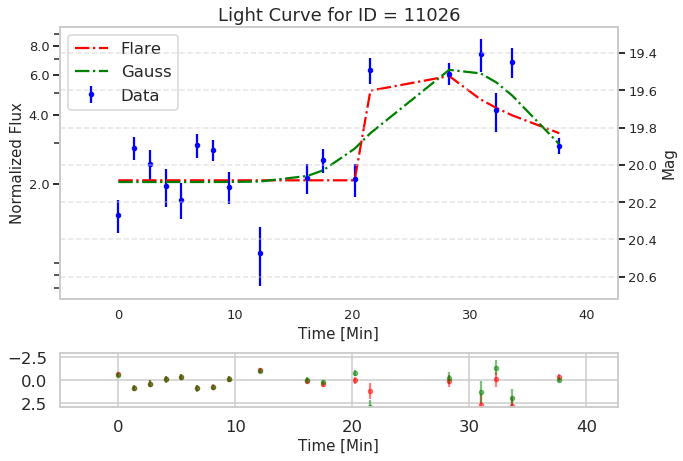

In [497]:
#ids used: 36262, 12173, 4720
#idflare =2286, 54288, 38211
#12173, 38211

transient = mf.findtransient(lightcurve_flare)
fl_indx = transient['fl_indx'].values[0]
offset, amp, sigma, timepeak, isflare = mf.parameters_guess(lightcurve_flare, fl_indx)
y = lightcurve_flare['psfflux'].values[isflare]
err = lightcurve_flare['psffluxerr'].values[isflare]
t_sec = (lightcurve_flare['mjd'].values[isflare]-np.min(lightcurve_flare['mjd'].values[isflare])) *24*60

fig = plt.figure(figsize=(10, 7))
grid = plt.GridSpec(4, 2, hspace=1, wspace=.5)
ax = fig.add_subplot(grid[0:3, 0:2])

fluxscale = min(y)
ax.errorbar(t_sec,(y/fluxscale),err/fluxscale, color='blue',linestyle='none', marker='.', label='Data')
ax.set_yscale('log')
ax.grid(False)

x_f,y_f,para_f,err_f = mf.fit_flaremodel(lightcurve_flare,fl_indx)
x_g,y_g,para_g,err_g = mf.fit_gauss(lightcurve_flare,fl_indx)
ax.plot(t_sec,y_f/fluxscale,color='red', linestyle='-.',label='Flare')
ax.plot(t_sec,y_g/fluxscale,color='green', linestyle='-.',label='Gauss')
ax.set_title(f'Light Curve for ID = {idflare}')
ax.set_ylabel('Normalized Flux',size=15)
ax.set_xlabel('Time [Min]',size=15)
ax.set_xlim(np.min(t_sec)-5, np.max(t_sec)+5)

ax.tick_params(which='major', length=7, axis='both', labelsize=13)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.legend() 


ax2 = ax.twinx()
ax2.plot(t_sec, lightcurve_flare['psfmag'].values[isflare], linestyle='none')
ax2.invert_yaxis()
ax2.tick_params(axis='both', labelsize=13, which='major', length=7)
ax2.grid(alpha=0.5, linestyle='--')
ax2.set_axisbelow(True)
ax2.set_ylabel('Mag',size=15)


#residuals:
ax_res = fig.add_subplot(grid[3:4, 0:2])
ax_res.errorbar(t_sec, (y - y_f)/fluxscale, err/fluxscale, color='red',linestyle='none', marker='.',label='Flare', alpha=.5)
ax_res.errorbar(t_sec, (y - y_g)/fluxscale, err/fluxscale, color='green',linestyle='none', marker='.',label='Gauss', alpha=.5)
ax_res.hlines(0, np.min(lightcurve_flare['mjd'].values[isflare]), np.max(lightcurve_flare['mjd'].values[isflare]))
maxresid = np.max([np.abs(y - y_f)/fluxscale, np.abs(y - y_g)/fluxscale])
ax_res.set_ylim(maxresid, -1 * maxresid)
ax_res.set_xlabel('Time [Min]',size=15)
ax_res.set_xlim(np.min(t_sec)-5, np.max(t_sec)+5)

plt.show()

#fig.savefig(f'final_plots/final_lightcurve_{idflare}_final.png', dpi=350)


## Find nobs per field (control time)

In [390]:
f436, f437, f488, f489, f538, f539, f540, f541, f591, f592, f638, f639, f685, f686 = seperate_fields(flare_energy)

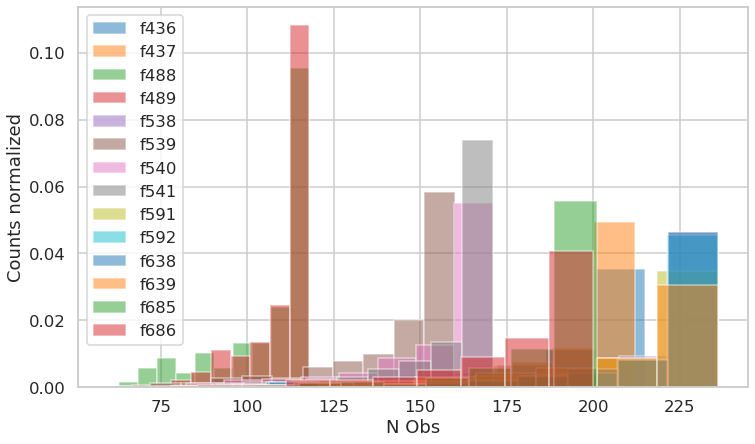

In [453]:
fig = plt.figure(figsize=(12,7))

for i,j in zip([f436, f437, f488, f489, f538, f539, f540, f541, f591, f592, f638, f639, f685, f686],['f436', 'f437', 'f488', 'f489', 'f538', 'f539', 'f540', 'f541', 'f591', 'f592', 'f638', 'f639', 'f685', 'f686']):
    plt.hist(i['n_obs'],label=j, alpha=.5, density=True)
plt.legend()
plt.xlabel('N Obs')
plt.ylabel('Counts normalized')
plt.show()
    
    

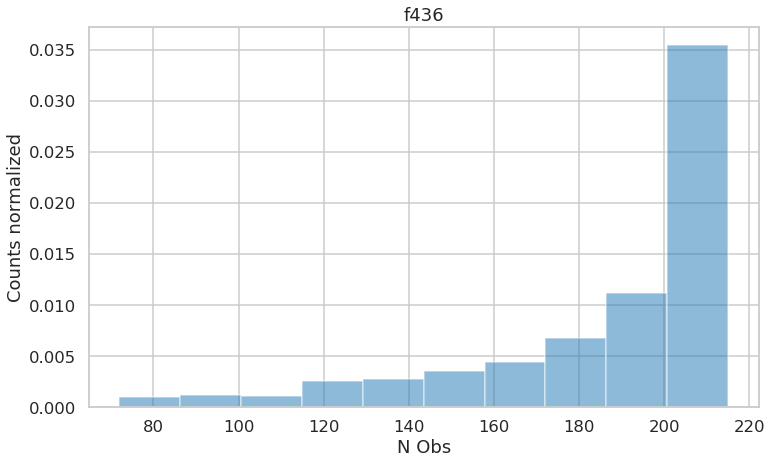

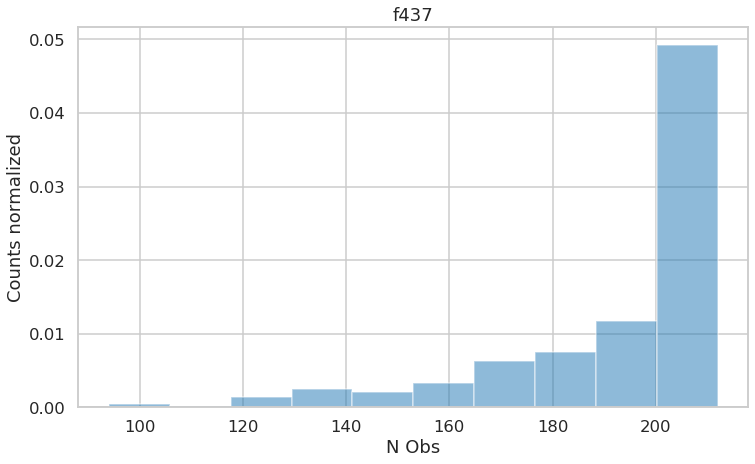

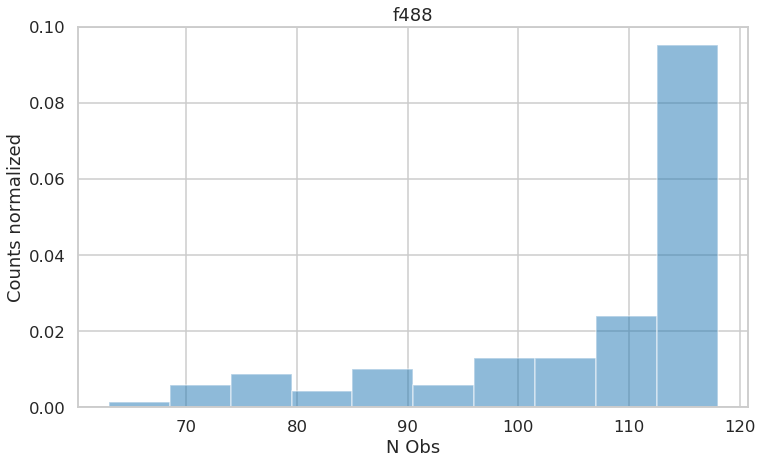

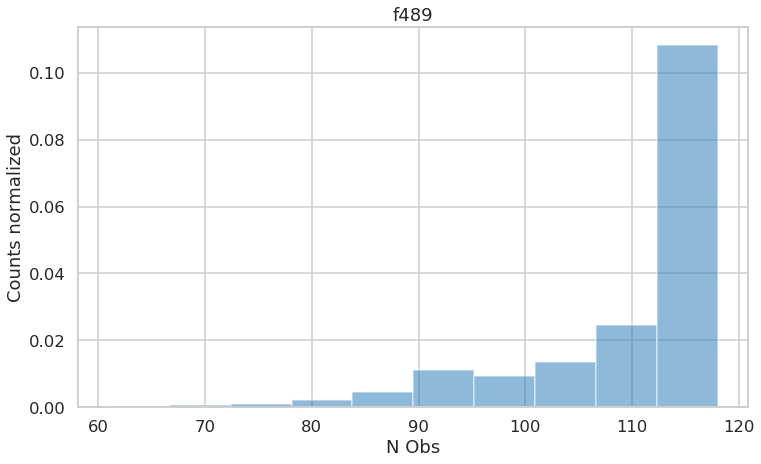

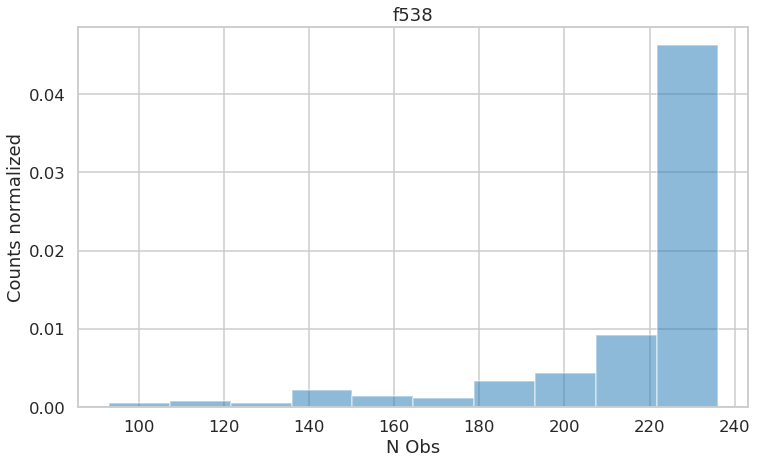

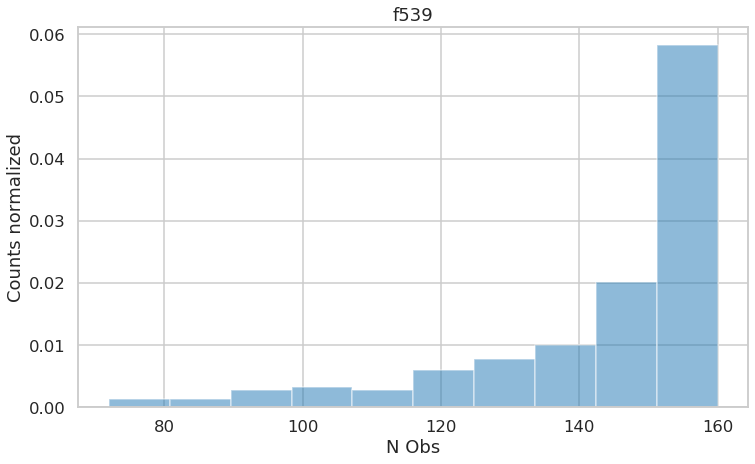

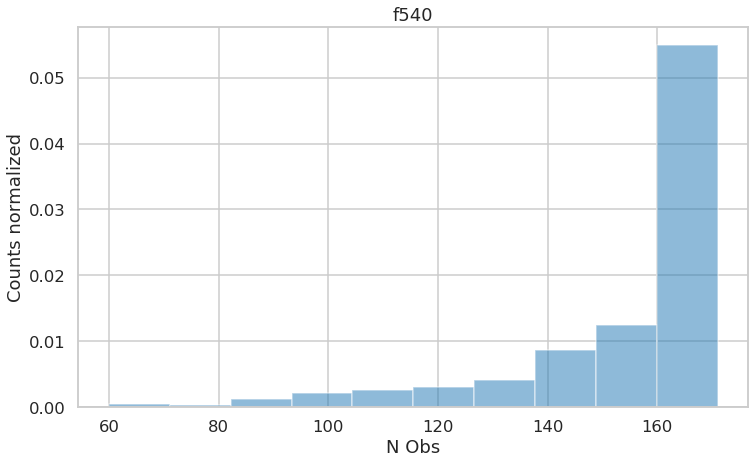

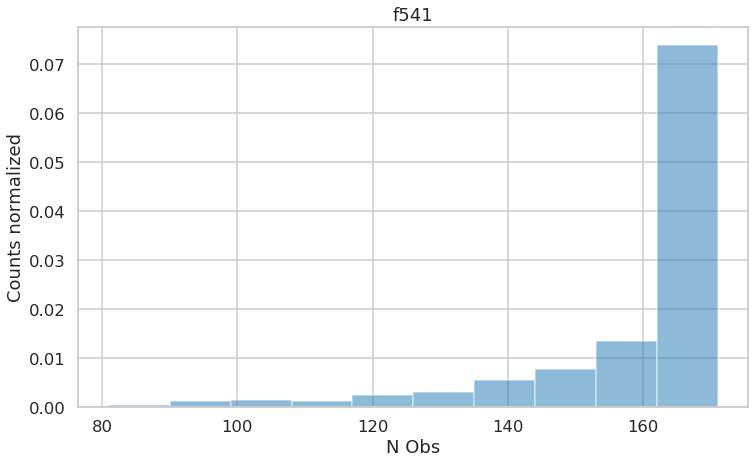

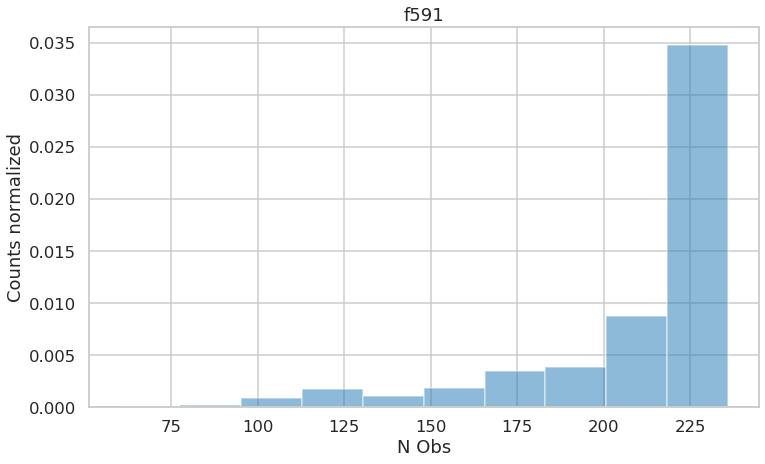

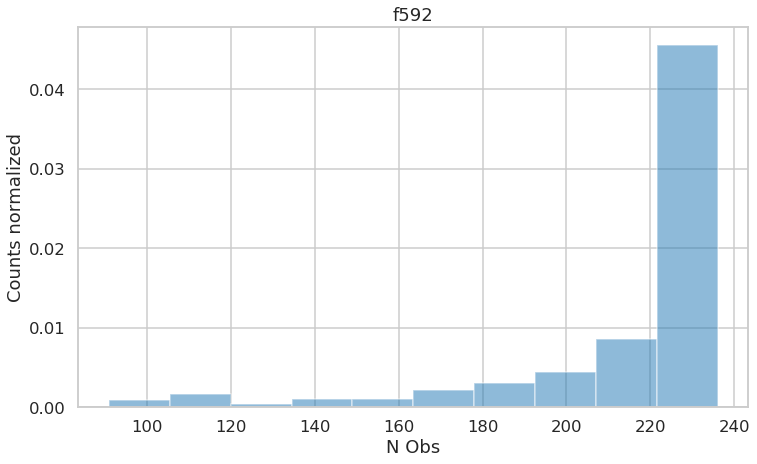

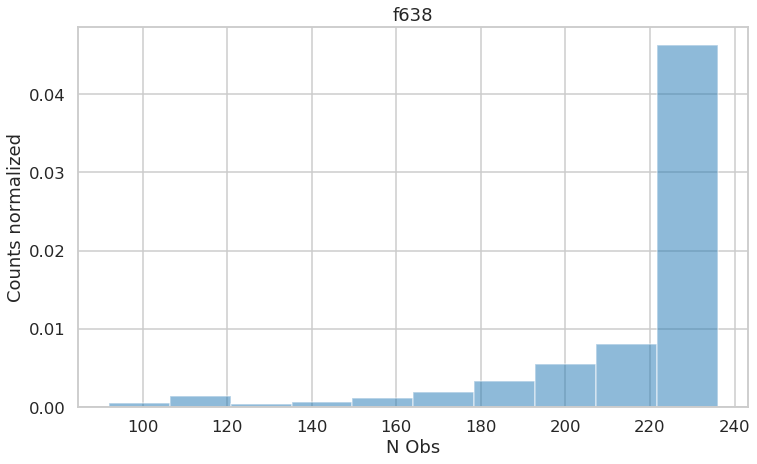

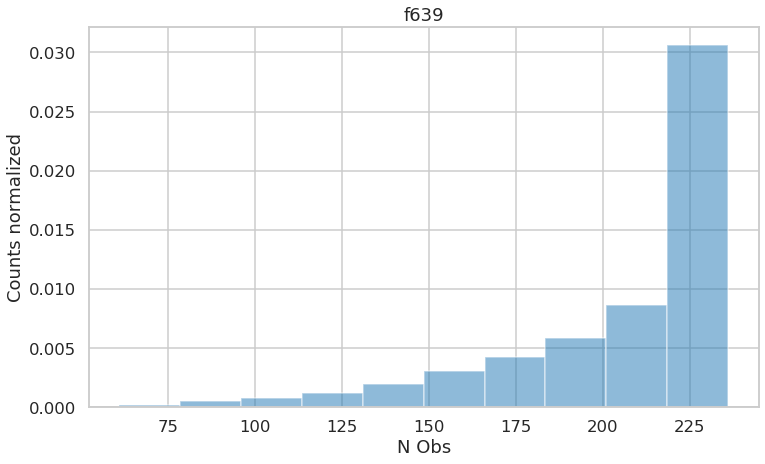

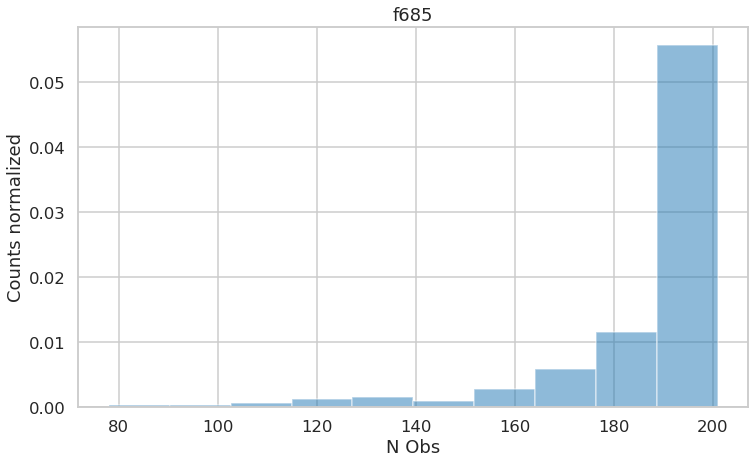

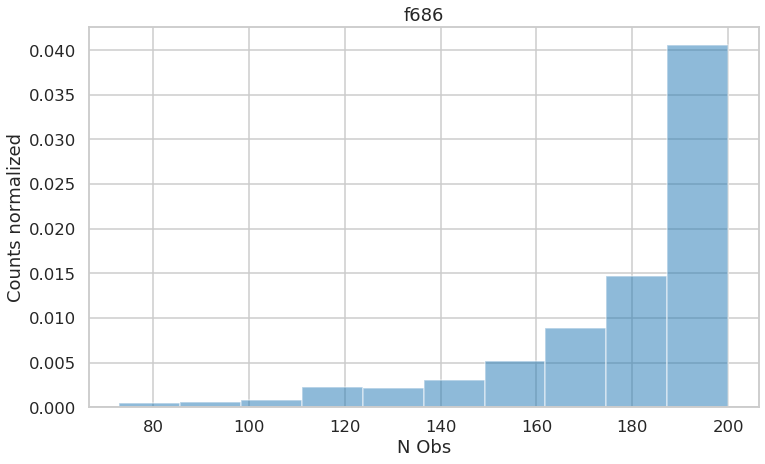

In [452]:

for i,j in zip([f436, f437, f488, f489, f538, f539, f540, f541, f591, f592, f638, f639, f685, f686],['f436', 'f437', 'f488', 'f489', 'f538', 'f539', 'f540', 'f541', 'f591', 'f592', 'f638', 'f639', 'f685', 'f686']):
    fig = plt.figure(figsize=(12,7))
    plt.hist(i['n_obs'],label=j, alpha=.5, density=True)
    plt.title(j)
    plt.xlabel('N Obs')
    plt.ylabel('Counts normalized')
    plt.show()
    
    

In [509]:
f685.loc[(f685['ztf_n_obs'] > 1100) & (f685['n_obs'] > 197)]

matchid          ra        dec  ztf_n_obs  \
10950  10685302031804  286.605376  31.556694       1125   

       exploded_unique_matchids_index  unique_matchids_exploded  \
10950                               3            10685302031804   

                                 match_file     id  aic_flare  chi_flare  \
10950  ztf_000685_zr_c08_q3_match_programid  31804  95.089508  87.089508   

       dof_flare  red_flare   aic_gauss   chi_gauss  dof_gauss  red_gauss  \
10950         26   3.349596  108.423172  100.423172         26    3.86243   

         exp_comp  perc_comp            fl_indx    equivdur      xpos  \
10950  785.901831  13.333664  [102 103 104 105]  275.003878  1620.917   

          ypos    flare_time      end_time  flare_end_diff  n_catflags  \
10950  2775.74  58345.292153  58346.305602        1.010637          18   

               axs_id n_obs            source_id    bp_rp  phot_g_mean_mag  \
10950  10685302031804   198  2042728193064144384  1.01799        18.059093   

       phot_g_mean_flux_over_error  phot_bp_mean_mag  phot_rp_mean_mag  \
10950                   661.343445         18.494293         17.476303   

       a_g_val  parallax  parallax_error  lum_val       axsdist      dm_16  \
10950      NaN  0.203956        0.137192      NaN  5.675180e-07  12.366198   

           E_16     Mr_16  FeH_16      dm_50      E_50  Mr_50  FeH_50  \
10950 -0.001772  3.925815   -0.85  12.707258  0.093167    5.0  -0.675   

           dm_84      E_84     Mr_84  FeH_84              gaia_id  \
10950  13.402698  0.198017  5.624185   -0.45  2042728193064144384   

             gal_x       gal_y       gal_z   abs_gal_z       gal_r        lum  \
10950 -6743.896235  3042.34065  679.785745  679.785745  7398.37638  33.324448   

       flare_energy  bp_rp_mag     g_mag       A_g      A_bp      A_rp  
10950     35.763787   0.886604  5.363711  0.231942  0.300787  0.169401

In [512]:
f685.loc[f685['id'] == 31804]

matchid          ra        dec  ztf_n_obs  \
10950  10685302031804  286.605376  31.556694       1125   

       exploded_unique_matchids_index  unique_matchids_exploded  \
10950                               3            10685302031804   

                                 match_file     id  aic_flare  chi_flare  \
10950  ztf_000685_zr_c08_q3_match_programid  31804  95.089508  87.089508   

       dof_flare  red_flare   aic_gauss   chi_gauss  dof_gauss  red_gauss  \
10950         26   3.349596  108.423172  100.423172         26    3.86243   

         exp_comp  perc_comp            fl_indx    equivdur      xpos  \
10950  785.901831  13.333664  [102 103 104 105]  275.003878  1620.917   

          ypos    flare_time      end_time  flare_end_diff  n_catflags  \
10950  2775.74  58345.292153  58346.305602        1.010637          18   

               axs_id n_obs            source_id    bp_rp  phot_g_mean_mag  \
10950  10685302031804   198  2042728193064144384  1.01799        18.059093   

       phot_g_mean_flux_over_error  phot_bp_mean_mag  phot_rp_mean_mag  \
10950                   661.343445         18.494293         17.476303   

       a_g_val  parallax  parallax_error  lum_val       axsdist      dm_16  \
10950      NaN  0.203956        0.137192      NaN  5.675180e-07  12.366198   

           E_16     Mr_16  FeH_16      dm_50      E_50  Mr_50  FeH_50  \
10950 -0.001772  3.925815   -0.85  12.707258  0.093167    5.0  -0.675   

           dm_84      E_84     Mr_84  FeH_84              gaia_id  \
10950  13.402698  0.198017  5.624185   -0.45  2042728193064144384   

             gal_x       gal_y       gal_z   abs_gal_z       gal_r        lum  \
10950 -6743.896235  3042.34065  679.785745  679.785745  7398.37638  33.324448   

       flare_energy  bp_rp_mag     g_mag       A_g      A_bp      A_rp  
10950     35.763787   0.886604  5.363711  0.231942  0.300787  0.169401

In [513]:
lc = pathlightcurve(f685,31804)

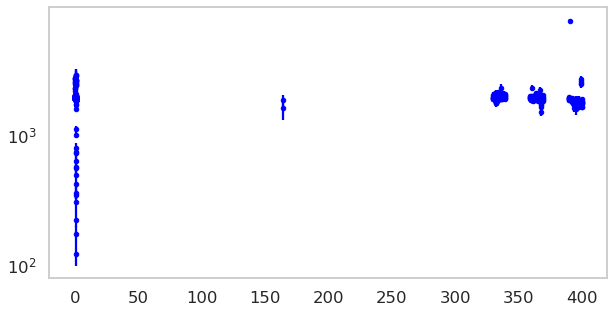

In [519]:
#ids used: 36262, 12173, 4720
#idflare =2286, 54288, 38211
#12173, 38211

transient = mf.findtransient(lc)
y = lc['psfflux'].values[:]
err = lc['psffluxerr'].values[:]
t_sec = (lc['mjd'].values[:]-np.min(lc['mjd'].values[:])) 

fig = plt.figure(figsize=(10, 7))
grid = plt.GridSpec(4, 2, hspace=1, wspace=.5)
ax = fig.add_subplot(grid[0:3, 0:2])

fluxscale = min(y)
ax.errorbar(t_sec,y,err, color='blue',linestyle='none', marker='.', label='Data')
ax.set_yscale('log')
#ax.set_xlim(-.1,1.5)

ax.grid(False)
plt.show()

In [518]:
print(time(lc))

(216, 0.23268530000495957)


In [ ]:
0.23268530000495957, nobs 199, id 112886
0.23268530000495957, nobs 200, id 52134
0.23082190000422997, nobs 170, id 52857

In [517]:
def time(lightcurve):
    time = lightcurve['mjd']-np.min(lightcurve['mjd'].values[:])
    t1 = time.loc[time < .5]
    t2 = time.loc[(time > .5) & (time<1.5)]
    nobs = len(t1) + len(t2)
    t1 = np.max(t1) -np.min(t1)
    t2 = np.max(t2) -np.min(t2)
    return nobs, t1 + t2
    